In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
import xgboost as xgb
import pandas as pd

#tools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


# train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Cross-validation helpers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

# 1.The Business value


This project utilizes machine learning technology to predict real estate prices, enhancing the accuracy of decision-making in the real estate market. By integrating and analyzing property-related information, we construct models to forecast property prices. The commercial value of this project lies in providing developers and investors with price predictions as a reference tool in their decision-making process, helping them better assess risks and opportunities.

# 2.Imput Data & Data Inspect

In [ ]:
df = pd.read_csv('KaggleAmes.csv')

In [ ]:
df_house = df.copy()
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#df[df['Alley'].notnull()]['SalePrice'].mean()

Text(0.5, 1.0, 'SalePrice Distribution')

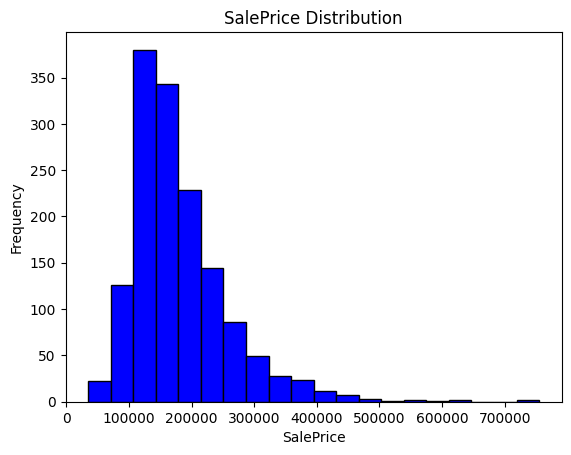

In [ ]:
plt.hist(df_house['SalePrice'], bins = 20, color='blue', edgecolor='black')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

In [ ]:
df_house['SalePrice'] = np.log(df_house['SalePrice'])

Based on the shape the sale price with the long right tail. The MSE of the extreme value will be supper high and difficult to predict. So Here we first change the saleprices into their logrithm.

Summary of the data:
There are totally 81 columns in the dataframe, with totally 1460 rows. The SalePrice is the target column we want to predict.

# 3.Prepare the Data for Machine Learning Algorithms & Explore and Visualize the Data to Gain Insights

missing value varibale clearning:

From the above analysis, we could find that there are five categroies are lack majority of data including:
1. 6   Alley          91 non-null     object
2. 57  FireplaceQu    770 non-null    object
3.  72  PoolQC         7 non-null      object
4. 73  Fence          281 non-null    object
5. 74  MiscFeature    54 non-null     object


In [ ]:
#6 Alley 91 non-null object
missing_percent = (1460-91)/1460
print(missing_percent)
df_house['Alley'].fillna('NA', inplace=True)

0.9376712328767123


Missing value here is 94%.However, according to the data describe, there are third categories 'NA' besides the Grvl and pave, we should fill all missing value as another catergory 'NA'.

In [ ]:
#57 FireplaceQu 770 non-null object
df_house['FireplaceQu'].fillna('NA', inplace=True)
df_house['FireplaceQu'].value_counts()

FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

there are sixth categories 'NA' , we fill all missing value as another catergory 'NA' meaning there is no fireplace around the house.

In [ ]:
df_house[df_house['FireplaceQu']=='NA']['Fireplaces'].describe()

count    690.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fireplaces, dtype: float64

In [ ]:
# 72 PoolQC 7 non-null object
missing_percent = (1460-7)/1460
missing_percent

0.9952054794520548

Almost 99.5% data is missing so we can delete this columns.

In [ ]:
df_house = df_house.drop ('PoolQC', axis = 1)

In [ ]:
#73 Fence 281 non-null object
df_house['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

There are five catergories NA besides these four, meaning there is no fence around the house. So filling all missing data with 'NA'

In [ ]:
df_house['Fence'].fillna('NA', inplace=True)

In [ ]:
#74 MiscFeature 54 non-null object
df_house['MiscFeature'].fillna('NA', inplace=True)
df_house['MiscFeature'].value_counts()

MiscFeature
NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

# 4.Check the remainings & Create New Features if Needed

In [ ]:
is_garagequal_nan = df_house['GarageQual'].isna()
is_garagecond_nan = df_house['GarageCond'].isna()
is_garagefinish_nan = df_house['GarageFinish'].isna()
is_garagetype_nan = df_house['GarageType'].isna()

# Combine the boolean masks to identify rows where any of the four columns is NaN
any_nan = is_garagequal_nan | is_garagecond_nan | is_garagefinish_nan | is_garagetype_nan

# Check if all specified columns have matching NaN values in rows where any NaN is detected
complete_match = all(df_house[any_nan][['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']].isna().all(axis=1))

print(complete_match)

True


Since checking of missing data in the four columns ('GarageQual', 'GarageCond', 'GarageFinish', 'GarageType') of the df_house DataFrame match across these columns is True ,we could fill the missing value together.  

In [ ]:
#GarageQual, GarageCond, GarageFinishi, GarageType missing value
df_house[['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']]=df_house[['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']].fillna('NA')
df_house['GarageYrBlt'].fillna(0, inplace = True)

Here, when there is no Garage, the year build column will be 0, so this column cannot fit into the linear model. Also when we build the model, we will set that when there is no garage, no garage value will not be counted into the model.

In [ ]:
#Electrical missing data since it only misses one data so that replace the NAN by the mode
df_house['Electrical'].fillna(df_house['Electrical'].mode()[0], inplace = True)

In [ ]:
#Variables related to the basement.
df_house[df_house['BsmtCond'].isna()].filter(like='Bsmt', axis=1).head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [ ]:
# Assuming df_house is your DataFrame

# Create boolean masks for NaN conditions in the specified columns
is_bsmtqual_nan = df_house['BsmtQual'].isna()
is_bsmtcond_nan = df_house['BsmtCond'].isna()
is_bsmtfintype1_nan = df_house['BsmtFinType1'].isna()

# Combine the boolean masks to identify rows where any of the three columns is NaN
any_nan = is_bsmtqual_nan | is_bsmtcond_nan | is_bsmtfintype1_nan

# Check if all specified columns have matching NaN values in rows where any NaN is detected
complete_match = all(df_house[any_nan][['BsmtQual', 'BsmtCond', 'BsmtFinType1']].isna().all(axis=1))

print(complete_match)


True


This result shows that the BsmtQual, BsmtCond and BsmtFinTypel are synchronous.We should deal with BsmtExposure and BsmtFinType2 whose missing value is 1422 to make sure all Bsmt data structure are same with missing value 1423.

In [ ]:
df_house[df_house['BsmtExposure'].isna()].filter(like='Bsmt', axis=1)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


From here, we can see that index 948 ['BsmtQual'] == 'Gd') & (df_house['BsmtCond'] == 'TA', however, the "BsmtExposure" have no value, which does not make sense. So checker the senarios with BsmtQ is Gd and the BsmtCond is TA, find the mode of the BsmtExposure under this situation.

In [ ]:
df_house[(df_house['BsmtQual'] == 'Gd') & (df_house['BsmtCond'] == 'TA')].filter(like='BsmtExposure', axis=1).value_counts()

BsmtExposure
No              338
Av              126
Gd               64
Mn               51
Name: count, dtype: int64

So for the BsmtExposure's index 948 we should use the No to replace the NAN.

In [ ]:
#df_house.loc[[948]][['BsmtExposure']].fillna('No', inplace = True)
BsmtExposure_mode = df_house['BsmtExposure'].mode()[0]
if pd.isna(df_house.loc[948, 'BsmtExposure']):
    df_house.loc[948, 'BsmtExposure'] = BsmtExposure_mode

In [ ]:
df_house[df_house['BsmtFinType2'].isna()].filter(like='Bsmt', axis=1)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [ ]:
df_house[(df_house['BsmtQual'] == 'Gd') & (df_house['BsmtCond'] == 'TA')].filter(like='Bsmt', axis=1)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,1
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0
5,Gd,TA,No,GLQ,732,Unf,0,64,796,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1452,Gd,TA,Gd,GLQ,547,Unf,0,0,547,1,0
1453,Gd,TA,No,Unf,0,Unf,0,1140,1140,0,0
1454,Gd,TA,No,GLQ,410,Unf,0,811,1221,1,0
1455,Gd,TA,No,Unf,0,Unf,0,953,953,0,0


In [ ]:
df_house[(df_house['BsmtFinSF2']<=500)&(df_house['BsmtFinSF2']>=400)][['BsmtFinType2', 'BsmtFinSF2']]

,BsmtFinType2,BsmtFinSF2
26,Rec,486
43,BLQ,491
177,BLQ,441
332,NaN,479
504,Rec,495
614,GLQ,480
633,LwQ,468
649,GLQ,499
754,LwQ,472
806,Rec,480


NO pattern found between the BsmtFinType2 and BsmtFinSF2. So use the mode to fill this missing data.

In [ ]:
bsmtFinType2_mode = df_house['BsmtFinType2'].mode()[0]
if pd.isna(df_house.loc[332, 'BsmtFinType2']):
    df_house.loc[332, 'BsmtFinType2'] = bsmtFinType2_mode

In [ ]:
df_house.loc[[332]][['BsmtFinType2']]

,BsmtFinType2
332,Unf


In [ ]:
is_bsmtexposure_nan = df_house['BsmtExposure'].isna()
is_bsmtfintype2_nan = df_house['BsmtFinType2'].isna()

# Combine the boolean masks to identify rows where any of the specified columns is NaN
any_bsmt_nan = is_bsmtexposure_nan | is_bsmtfintype2_nan

# Check if all specified columns have matching NaN values in rows where any NaN is detected
complete_bsmt_match = all(df_house[any_bsmt_nan][['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']].isna().all(axis=1))

print(complete_bsmt_match)

True


All Bsmt variables are with 1423 values so we can replace the other with NA.

In [ ]:
df_house[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]=df_house[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NA')

For the MasVnrType and MasVnrArea, their numbers of missing value is the same. So we check whether they lack the in the same level, if it is, we can replace the text variable MasVnrType as None, and replace the numerical varible MasVnrArea with 0 which mean there is no Masonry veneer area.

In [ ]:
df_house[(df_house['MasVnrType']=='None')&(df_house['MasVnrArea']!=0)][['MasVnrArea']]

,MasVnrArea


So we could fill 'None' the missing value of MasVnrType. and fill 0 in the missing value of MasVnrArea.

In [ ]:
df_house['MasVnrType'].fillna('None', inplace = True)
df_house['MasVnrArea'].fillna(0, inplace = True)

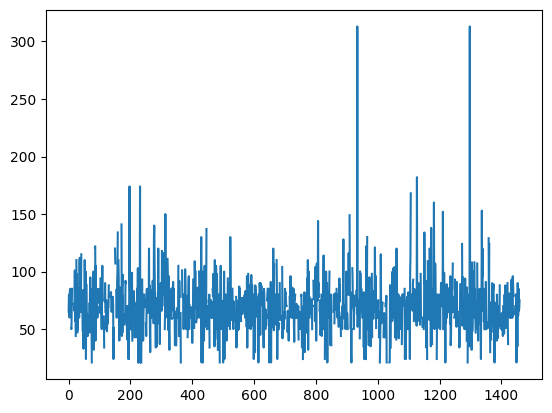

In [ ]:
plt.plot(df_house['LotFrontage'])

Based on the distribution of the feature LotFrontage, we can get use the mean to fill the missing value

In [ ]:
df_house['LotFrontage'].fillna(df_house['LotFrontage'].mean(), inplace = True)

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 5.Detect the relationship between the variable and the Saleprices.

## 5.1 detect one by one.

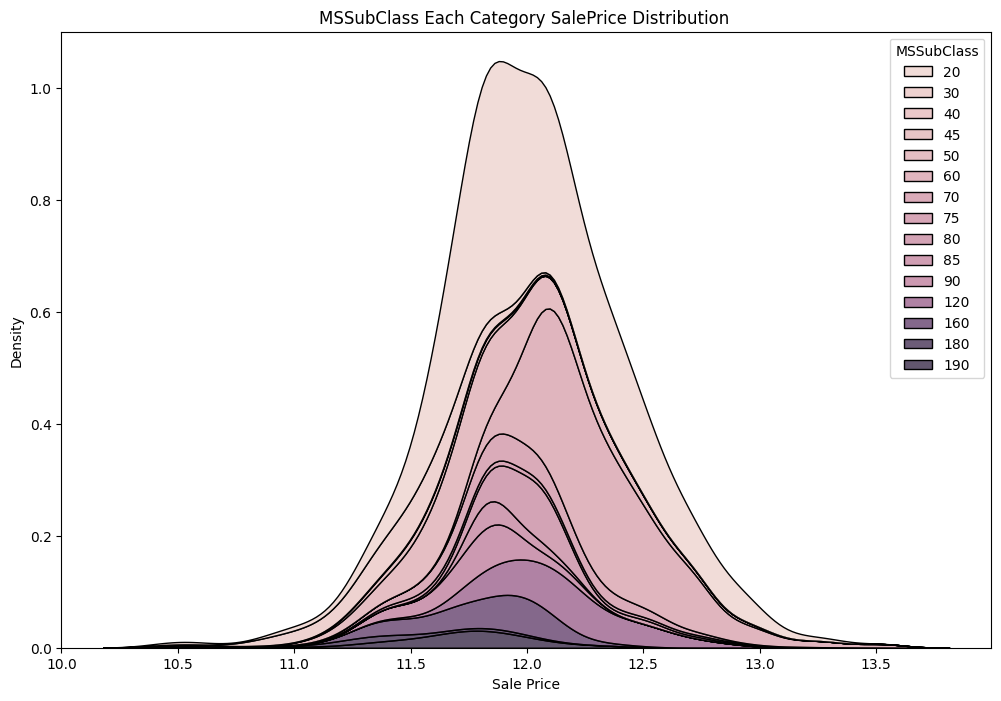

In [ ]:
# 1st Variable:MSSubClass

plt.figure(figsize=(12, 8))

# Plotting KDE plots for each 'Region'
sns.kdeplot(
    data=df_house,
    x='SalePrice',
    hue='MSSubClass',
    multiple='stack'
)

plt.title('MSSubClass Each Category SalePrice Distribution ')
plt.xlabel('Sale Price')
plt.ylabel('Density')

plt.show()


From the distribution based on the different catergory we can conclude that with the category number's decreasing, house price will be highly likely having the better price. So it will impact the sale price.

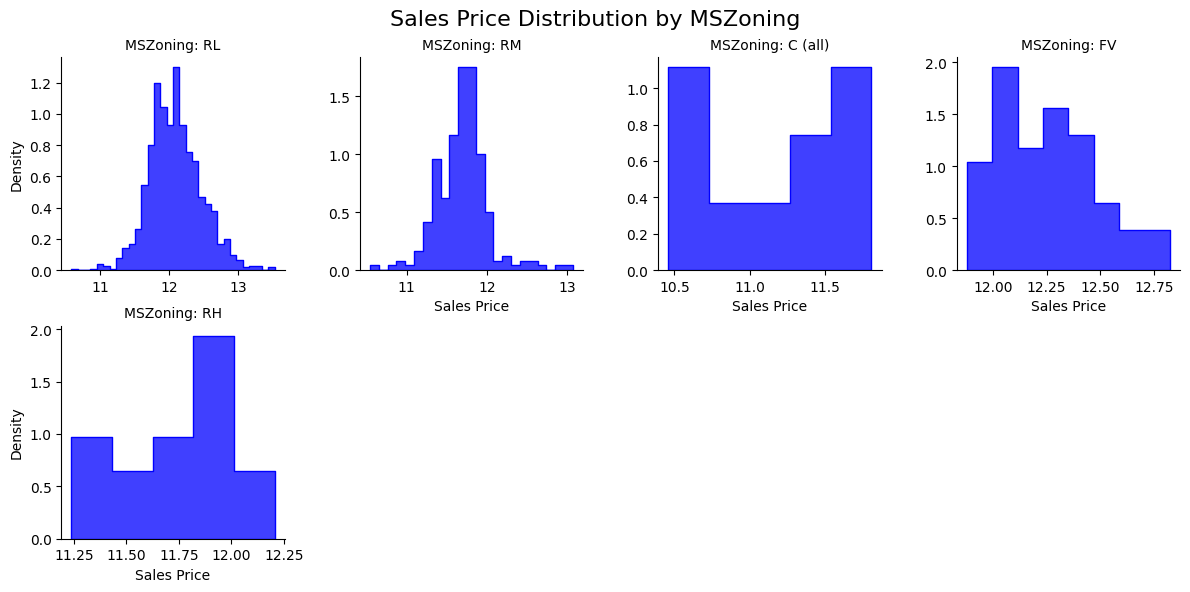

In [ ]:
# 2nd MSZoning
# Create a FacetGrid
g = sns.FacetGrid(df_house, col='MSZoning', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'SalePrice', element='step', stat='density', common_norm=False, color='blue')

# Adding more details to the plot
g.fig.subplots_adjust(top=0.9) # Adjust the top to make space for the title
g.fig.suptitle('Sales Price Distribution by MSZoning', fontsize=16)
g.set_axis_labels('Sales Price', 'Density')
g.set_titles('MSZoning: {col_name}')

plt.show()


From the chart, we can figure out that different sale zoning have slighly difference, like the price is high in the FV	Floating Village Residential. So we could save this and use the onehot encoder.

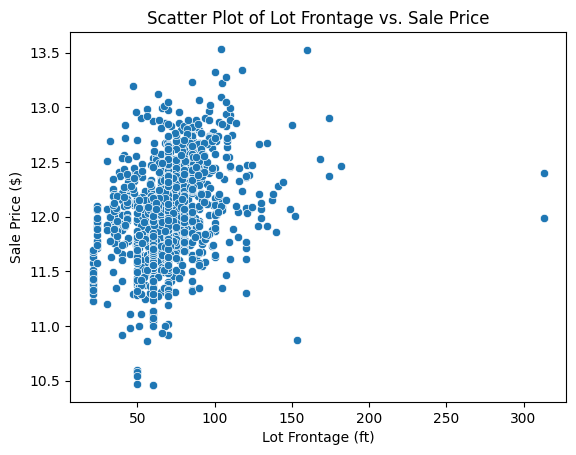

In [ ]:
# 3rd LotFrontage

sns.scatterplot(data=df_house, x='LotFrontage', y='SalePrice')

# Adding title and labels for clarity
plt.title('Scatter Plot of Lot Frontage vs. Sale Price')
plt.xlabel('Lot Frontage (ft)')
plt.ylabel('Sale Price ($)')

plt.show()


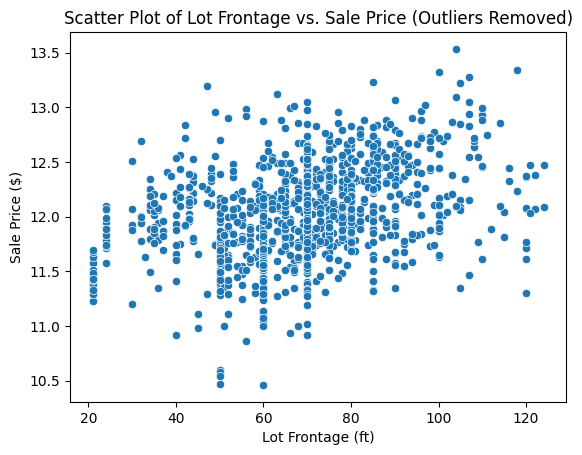

In [ ]:
# Assuming df_house is your DataFrame
Q1 = df_house[['LotFrontage']].quantile(0.1)
Q3 = df_house[['LotFrontage']].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of data points where either LotFrontage or SalePrice are outliers
outliers = ((df_house[['LotFrontage']] < (Q1 - 1.5 * IQR)) | (df_house[['LotFrontage']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['LotFrontage','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='LotFrontage', y='SalePrice')
plt.title('Scatter Plot of Lot Frontage vs. Sale Price (Outliers Removed)')
plt.xlabel('Lot Frontage (ft)')
plt.ylabel('Sale Price ($)')

plt.show()


The scatter plot did not show obvious relationship between this variable and the saleprice so that we could delete that in our analysis even when the outliers are deleted.

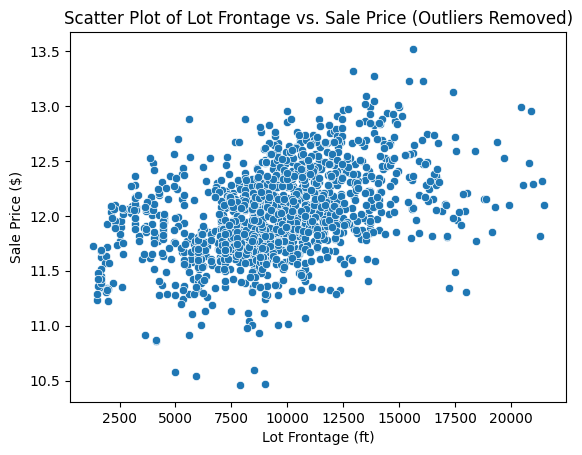

In [ ]:
# 4th LotArea
# Assuming df_house is your DataFrame
Q1 = df_house[['LotArea']].quantile(0.1)
Q3 = df_house[['LotArea']].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of data points where either LotArea or SalePrice are outliers
outliers = ((df_house[['LotArea']] < (Q1 - 1.5 * IQR)) | (df_house[['LotArea']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['LotArea','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='LotArea', y='SalePrice')
plt.title('Scatter Plot of Lot Frontage vs. Sale Price (Outliers Removed)')
plt.xlabel('Lot Frontage (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

Higher lot size, higher sale price, so that we should keep it.

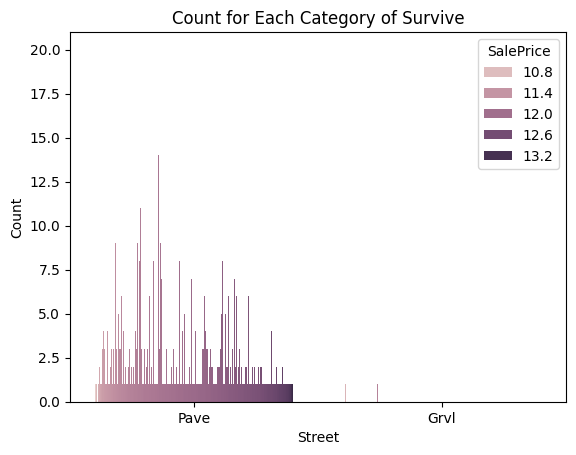

In [ ]:
#5th Street
column = 'Street'
sns.countplot(x = column, hue = 'SalePrice', data = df_house)
plt.title('Count for Each Category of Survive')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='SalePrice')
plt.show()

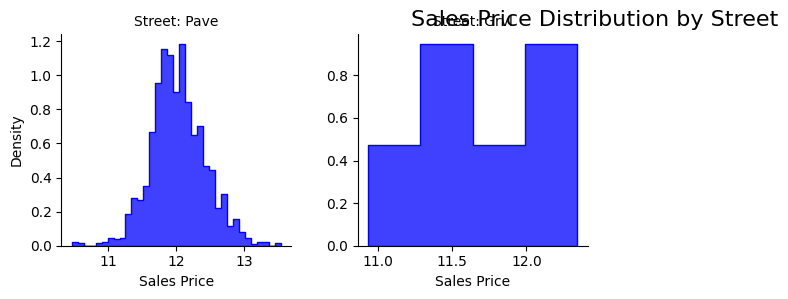

In [ ]:
# difficult to figure out, change to another way
# Create a FacetGrid
g = sns.FacetGrid(df_house, col='Street', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'SalePrice', element='step', stat='density', common_norm=False, color='blue')

# Adding more details to the plot
g.fig.subplots_adjust(top=0.9) # Adjust the top to make space for the title
g.fig.suptitle('Sales Price Distribution by Street', fontsize=16)
g.set_axis_labels('Sales Price', 'Density')
g.set_titles('Street: {col_name}')

plt.show()

In [ ]:
df_house['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Since we have only 6 data of Grvl among 1460 data, and this 6 senarios's saleprice has no different with the distrubution of Pave. So that we can delete it.

In [ ]:
#6th Alley
df_house['Alley'].value_counts()

Alley
NA      1369
Grvl      50
Pave      41
Name: count, dtype: int64

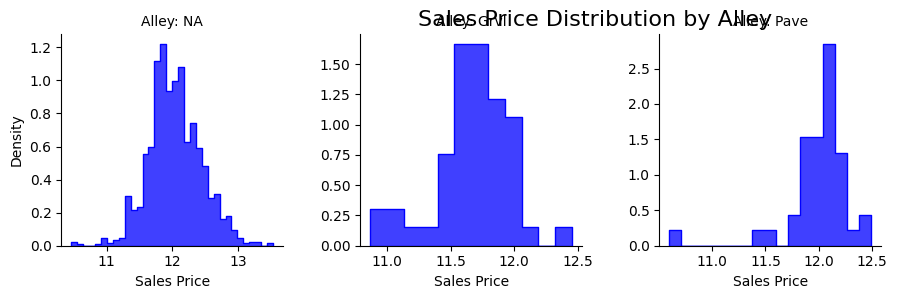

In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(df_house, col='Alley', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'SalePrice', element='step', stat='density', common_norm=False, color='blue')

# Adding more details to the plot
g.fig.subplots_adjust(top=0.9) # Adjust the top to make space for the title
g.fig.suptitle('Sales Price Distribution by Alley', fontsize=16)
g.set_axis_labels('Sales Price', 'Density')
g.set_titles('Alley: {col_name}')

plt.show()

Save it since Pave alley access has the higher price comparing to the Gravel. Comparing to the 5th variable, this is more useful since people care about the alley type access more to property rather than road type around the hose.

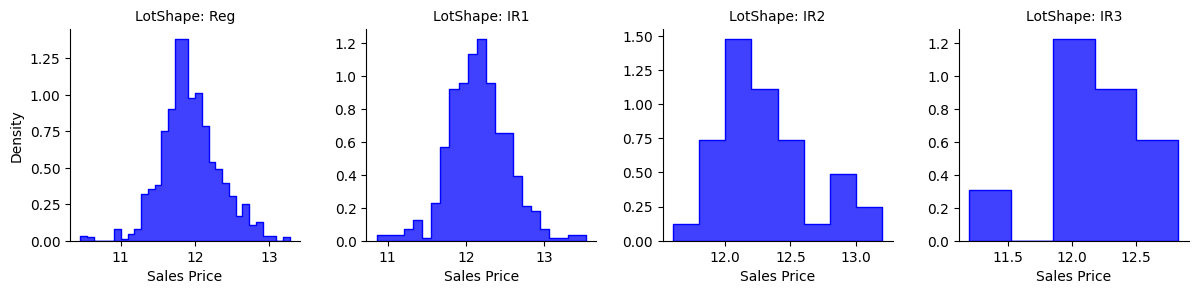

In [ ]:
# 7th LotShape
# Create a FacetGrid
g = sns.FacetGrid(df_house, col='LotShape', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'SalePrice', element='step', stat='density', common_norm=False, color='blue')

# Adding more details to the plot
g.fig.subplots_adjust(top=0.9) # Adjust the top to make space for the title
g.set_axis_labels('Sales Price', 'Density')
g.set_titles('LotShape: {col_name}')

plt.show()

Save it since when the type is irregular the highest price will no reach out to 13 so that the shape impacts saleprice. ???? wether can we merge the first  3 categories as one and the irregular as another one.

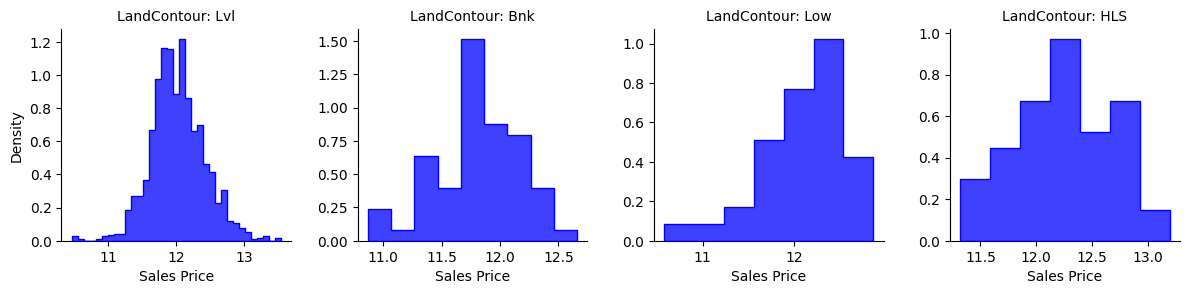

In [ ]:
# 8th LandContour
# Create a FacetGrid
g = sns.FacetGrid(df_house, col='LandContour', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'SalePrice', element='step', stat='density', common_norm=False, color='blue')

# Adding more details to the plot
g.fig.subplots_adjust(top=0.9) # Adjust the top to make space for the title
g.set_axis_labels('Sales Price', 'Density')
g.set_titles('LandContour: {col_name}')

plt.show()

Save. Since different category shows different saleprice pattern. With low position, the price will not as high as 13 or more. HLS means when the house is on the mountain, the sale price will generally increase.

In [ ]:
#Utilities
df_house['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Delete. There is only one feild that label as NoSeWa so that there is no comparing requirment with other 1459 feild with Allpun.

In [ ]:
# LotConfig
df_house['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

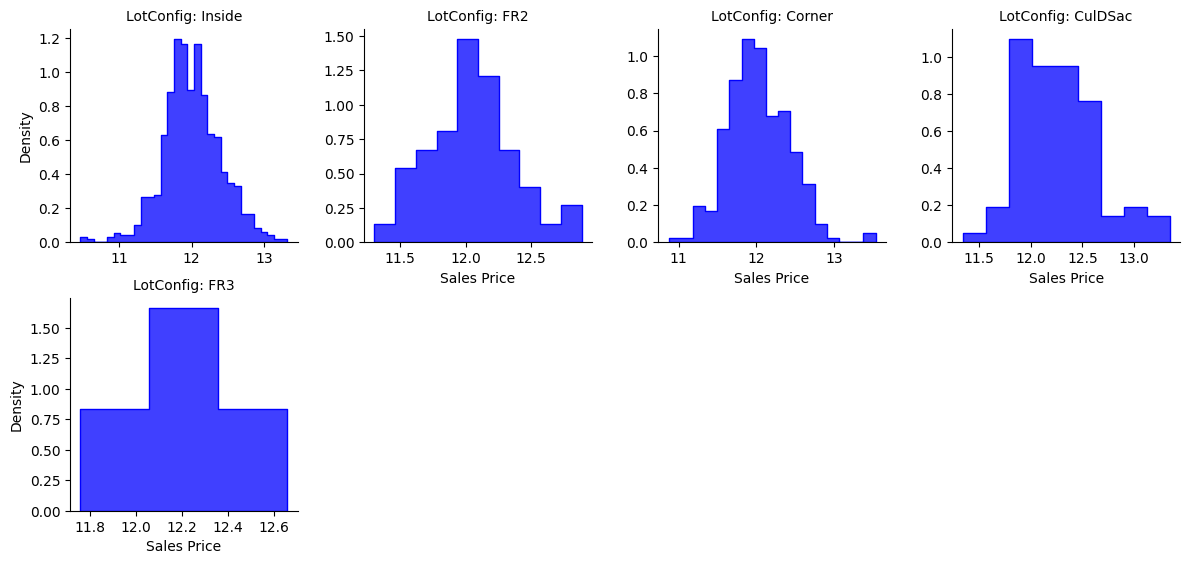

In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(df_house, col='LotConfig', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'SalePrice', element='step', stat='density', common_norm=False, color='blue')

# Adding more details to the plot
g.fig.subplots_adjust(top=0.9) # Adjust the top to make space for the title
g.set_axis_labels('Sales Price', 'Density')
g.set_titles('LotConfig: {col_name}')

plt.show()

Delete. No obvious patten seen.

In [ ]:
#LandSlope
df_house['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

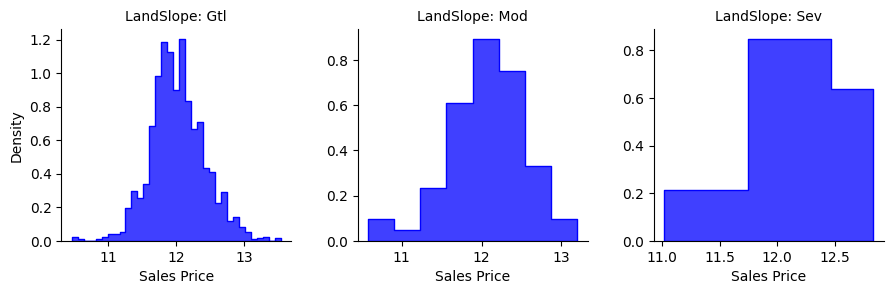

In [ ]:
g = sns.FacetGrid(df_house, col='LandSlope', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'SalePrice', element='step', stat='density', common_norm=False, color='blue')

# Adding more details to the plot
g.fig.subplots_adjust(top=0.9) # Adjust the top to make space for the title
g.set_axis_labels('Sales Price', 'Density')
g.set_titles('LandSlope: {col_name}')

plt.show()

Delete. Since most of data is Gtl and other two category did not have obvious different distribution compared to the Gtl so that we could delete it.

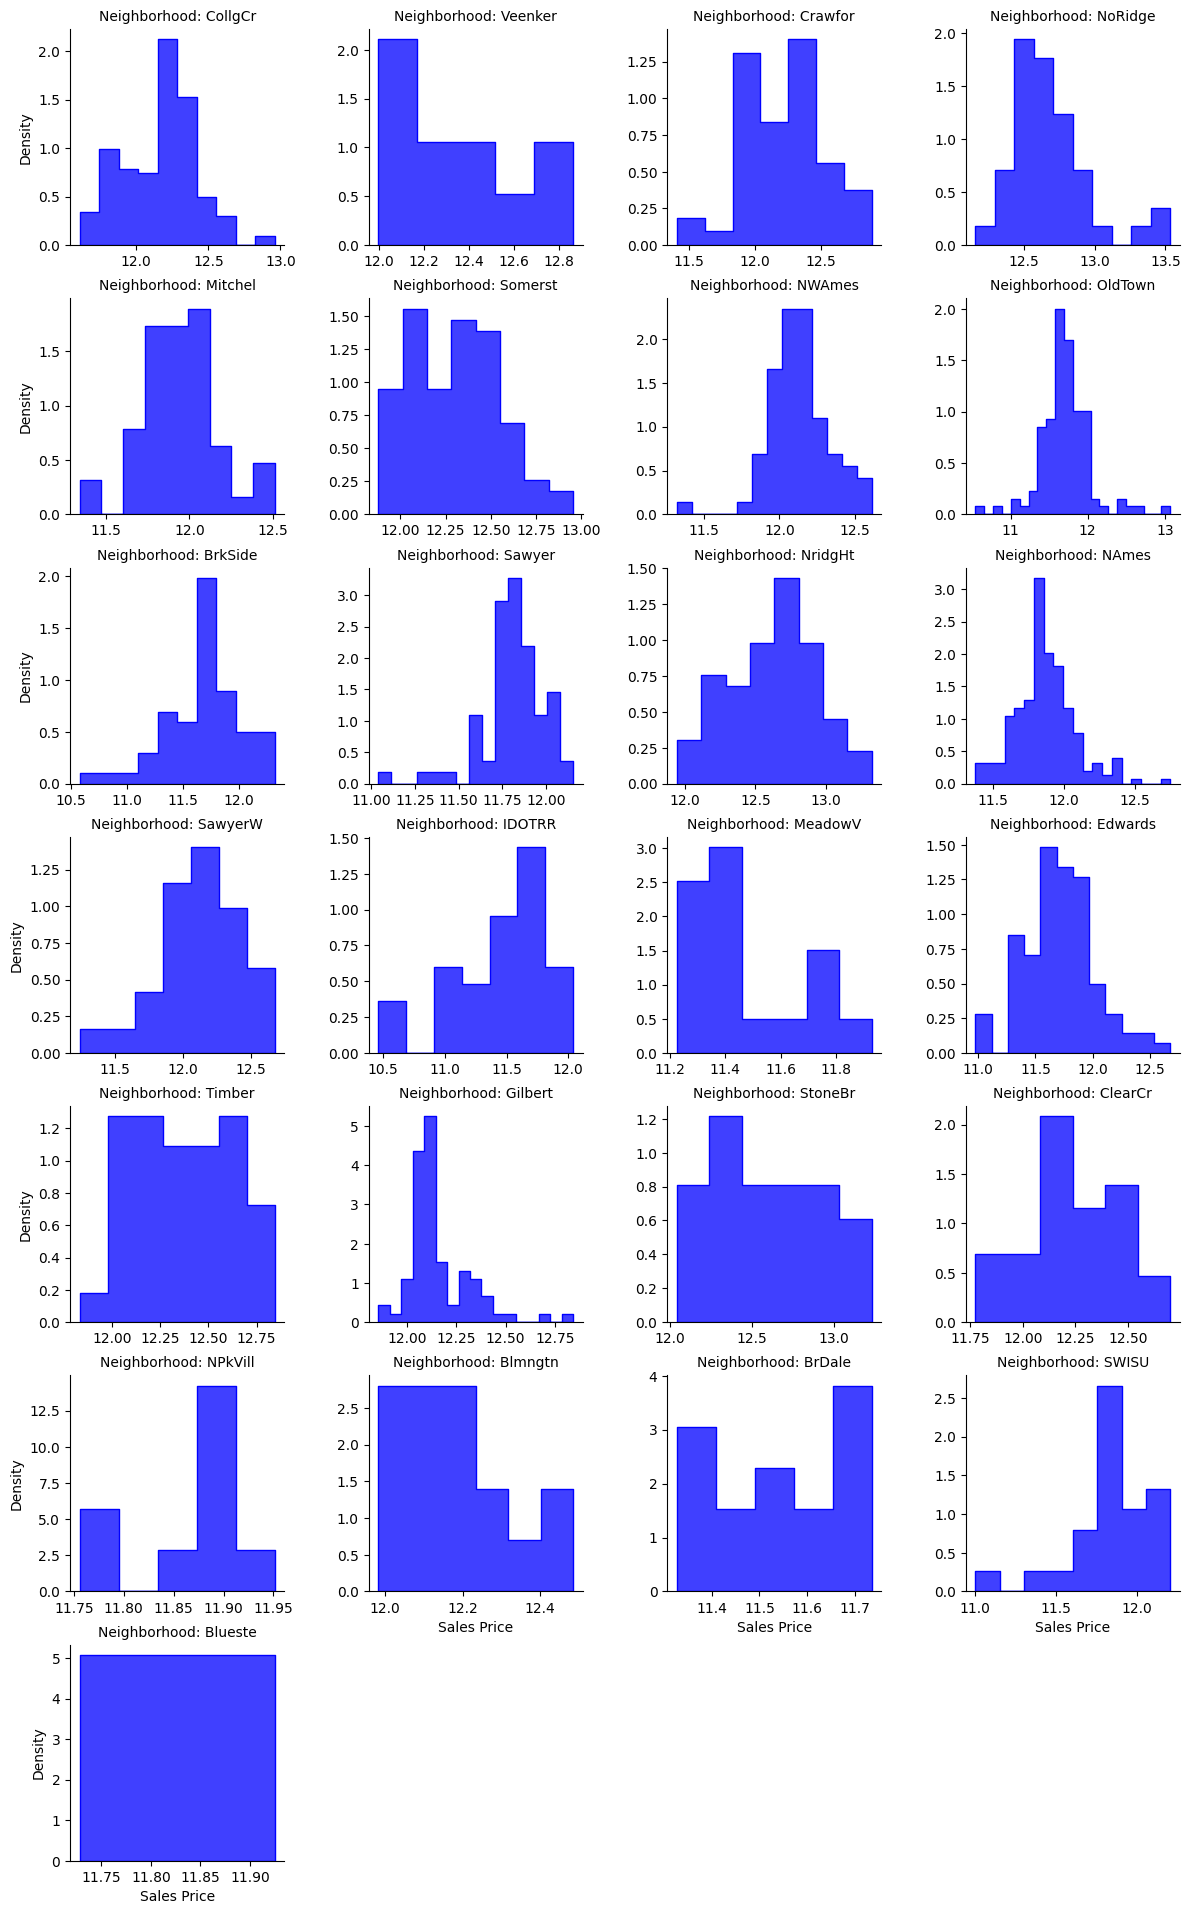

In [ ]:
# Neighborhood
#df_house['Neighborhood'].value_counts()

g = sns.FacetGrid(df_house, col='Neighborhood', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'SalePrice', element='step', stat='density', common_norm=False, color='blue')

# Adding more details to the plot
g.fig.subplots_adjust(top=0.9) # Adjust the top to make space for the title
g.set_axis_labels('Sales Price', 'Density')
g.set_titles('Neighborhood: {col_name}')

plt.show()

Difficult to figure out so that use the MIS and MIC method to detect all varibale first.

## 5.2 Improve the method based on the 4.1 situation.MIS, MIC

Use the Mutal Information Scores and the Maximum Information Coefficient Scores
Objective:  figure out how each variable impact the sale price.

In [ ]:
df_house_copy = df_house.copy()

label_encoder = LabelEncoder()

for column in df_house_copy.columns:
    if df_house_copy[column].dtype == 'object':
        df_house_copy[column] = label_encoder.fit_transform(df_house_copy[column])

In [ ]:
!pip install minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187100 sha256=2ccb0ec6c82c74f7ce75761b9ebc81c5b9b307226bb2833e26dcf644d3f9aecc
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [ ]:
df_house_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,0,4,1,0,2,2008,8,4,12.247694
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,0,4,1,0,5,2007,8,4,12.109011
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,0,4,1,0,9,2008,8,4,12.317167
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,0,4,1,0,2,2006,8,0,11.849398
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,0,4,1,0,12,2008,8,4,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,...,0,0,4,1,0,8,2007,8,4,12.072541
1456,1457,20,3,85.0,13175,1,1,3,3,0,...,0,0,2,1,0,2,2010,8,4,12.254863
1457,1458,70,3,66.0,9042,1,1,3,3,0,...,0,0,0,3,2500,5,2010,8,4,12.493130
1458,1459,20,3,68.0,9717,1,1,3,3,0,...,0,0,4,1,0,4,2010,8,4,11.864462


In [ ]:
random.seed(42)

# Assuming 'SalePrice' is your target variable and it exists in df_house_copy
y = df_house_copy['SalePrice'].values

# Store the results
mutual_info_results = []
mic_results = []

for column in df_house_copy.columns:
    if column == 'SalePrice':  # Skip the target variable itself
        continue
    X = df_house_copy[column].values.reshape(-1, 1)

    # Calculate Mutual Information
    mi_score = mutual_info_regression(X, y, random_state=42)
    mutual_info_results.append((column, mi_score[0]))

    # Calculate MIC
    mine = MINE()
    mine.compute_score(X.ravel(), y)
    mic_score = mine.mic()
    mic_results.append((column, mic_score))

# Sorting the results by score
mutual_info_sorted = sorted(mutual_info_results, key=lambda x: x[1], reverse=True)
mic_sorted = sorted(mic_results, key=lambda x: x[1], reverse=True)

# Displaying the results
print("Mutual Information Scores:")
for feature, score in mutual_info_sorted:
    print(f"{feature}: {score:.4f}")

print("\nMaximum Information Coefficient (MIC) Scores:")
for feature, score in mic_sorted:
    print(f"{feature}: {score:.4f}")

Mutual Information Scores:
OverallQual: 0.5182
GrLivArea: 0.3594
GarageCars: 0.3579
ExterQual: 0.3337
KitchenQual: 0.3291
GarageArea: 0.2901
BsmtQual: 0.2831
FullBath: 0.2671
YearBuilt: 0.2646
TotalBsmtSF: 0.2632
GarageYrBlt: 0.2552
1stFlrSF: 0.2453
GarageType: 0.2050
LotFrontage: 0.2000
Foundation: 0.1952
YearRemodAdd: 0.1906
FireplaceQu: 0.1865
TotRmsAbvGrd: 0.1837
GarageFinish: 0.1674
Fireplaces: 0.1611
HeatingQC: 0.1284
BsmtFinSF1: 0.1254
MSZoning: 0.1154
OverallCond: 0.1146
Neighborhood: 0.1141
2ndFlrSF: 0.1130
MasVnrType: 0.1054
HalfBath: 0.0967
MasVnrArea: 0.0939
Exterior1st: 0.0865
LotArea: 0.0861
LotShape: 0.0859
SaleCondition: 0.0797
HouseStyle: 0.0764
GarageCond: 0.0721
SaleType: 0.0700
GarageQual: 0.0692
BedroomAbvGr: 0.0668
CentralAir: 0.0636
OpenPorchSF: 0.0613
BsmtUnfSF: 0.0583
MSSubClass: 0.0574
BsmtExposure: 0.0545
Fence: 0.0442
PavedDrive: 0.0435
BsmtCond: 0.0428
Electrical: 0.0417
WoodDeckSF: 0.0402
BsmtFinType1: 0.0366
BldgType: 0.0363
Exterior2nd: 0.0329
BsmtFinTyp

## 5.3 Detect the numerical varible based on the 5.2 result.

Mainly try to find the redundant numerical variable, also detect whether to create new varibales based on the data's real world meaning.

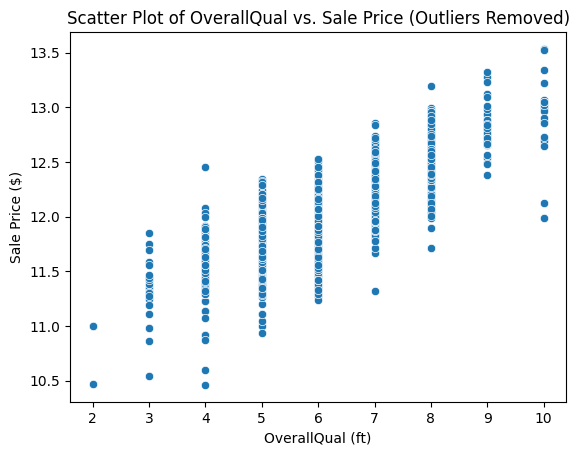

In [ ]:
#17th OverallQual

# Assuming df_house is your DataFrame
Q1 = df_house[['OverallQual']].quantile(0.1)
Q3 = df_house[['OverallQual']].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of data points where either OverallQual or SalePrice are outliers
outliers = ((df_house[['OverallQual']] < (Q1 - 1.5 * IQR)) | (df_house[['OverallQual']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['OverallQual','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='OverallQual', y='SalePrice')
plt.title('Scatter Plot of OverallQual vs. Sale Price (Outliers Removed)')
plt.xlabel('OverallQual (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

Save it. Higher quality, higher price.

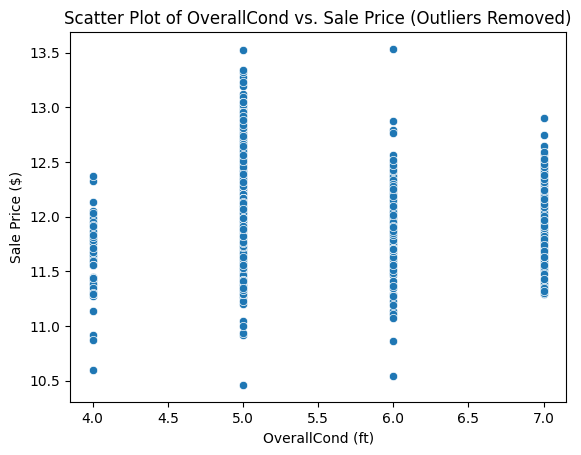

In [ ]:
#17th OverallCond

# Assuming df_house is your DataFrame
Q1 = df_house[['OverallCond']].quantile(0.1)
Q3 = df_house[['OverallCond']].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of data points where either OverallCond or SalePrice are outliers
outliers = ((df_house[['OverallCond']] < (Q1 - 1.5 * IQR)) | (df_house[['OverallCond']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['OverallCond','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='OverallCond', y='SalePrice')
plt.title('Scatter Plot of OverallCond vs. Sale Price (Outliers Removed)')
plt.xlabel('OverallCond (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

Save it. Higher condition,lower liability of low price

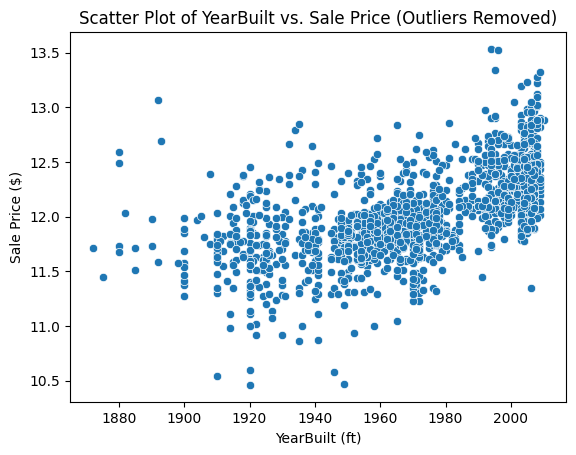

In [ ]:
# 19 YearBuilt
Q1 = df_house[['YearBuilt']].quantile(0.1)
Q3 = df_house[['YearBuilt']].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of data points where either YearBuilt or SalePrice are outliers
outliers = ((df_house[['YearBuilt']] < (Q1 - 1.5 * IQR)) | (df_house[['YearBuilt']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['YearBuilt','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='YearBuilt', y='SalePrice')
plt.title('Scatter Plot of YearBuilt vs. Sale Price (Outliers Removed)')
plt.xlabel('YearBuilt (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

Save it. Obvious relationship: newer house, higher price.

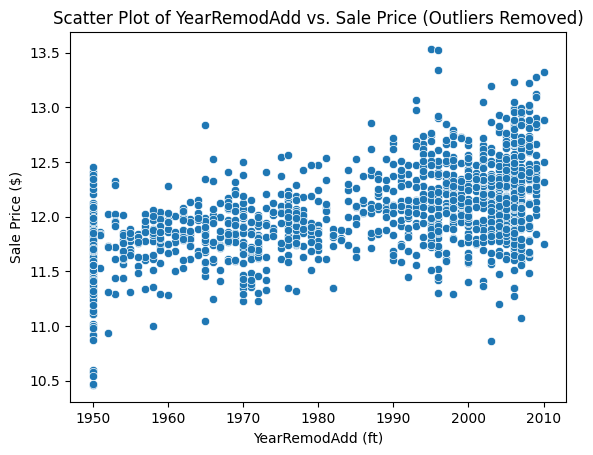

In [ ]:
# 20th YearRemodAdd
Q1 = df_house[['YearRemodAdd']].quantile(0.1)
Q3 = df_house[['YearRemodAdd']].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of data points where either YearRemodAdd or SalePrice are outliers
outliers = ((df_house[['YearRemodAdd']] < (Q1 - 1.5 * IQR)) | (df_house[['YearRemodAdd']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['YearRemodAdd','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='YearRemodAdd', y='SalePrice')
plt.title('Scatter Plot of YearRemodAdd vs. Sale Price (Outliers Removed)')
plt.xlabel('YearRemodAdd (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

In [ ]:
np.mean(df_house['YearBuilt']==df_house['YearRemodAdd'])

0.5232876712328767

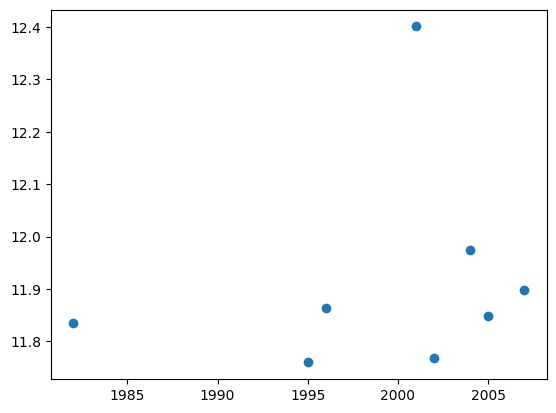

In [ ]:
test_year = df_house[(df_house['YearBuilt']==1950)&(df_house['YearRemodAdd']!=1950)][['YearBuilt','YearRemodAdd','SalePrice']]
plt.scatter(test_year['YearRemodAdd'],test_year['SalePrice'] )
plt.show()

We can fugure out that 52% of the YearBuilt and YearRemodAdd are the same. Next step is to test wither remodel late will affact the house price comparing to the house without remodeling and built in the same year. From the chart we did not find the relationship, means that remodeling later will not improve the house price significantly so that we can use the YearBuilt and delete the YearRemodAdd.

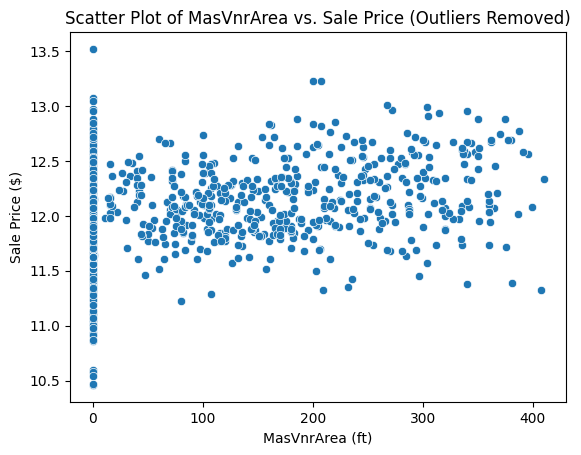

In [ ]:
# 26th MasVnrArea
Q1 = df_house[['MasVnrArea']].quantile(0.1)
Q3 = df_house[['MasVnrArea']].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of data points where either MasVnrArea or SalePrice are outliers
outliers = ((df_house[['MasVnrArea']] < (Q1 - 1.5 * IQR)) | (df_house[['MasVnrArea']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['MasVnrArea','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='MasVnrArea', y='SalePrice')
plt.title('Scatter Plot of MasVnrArea vs. Sale Price (Outliers Removed)')
plt.xlabel('MasVnrArea (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

Delete. Since there is no relationship with the sale price.

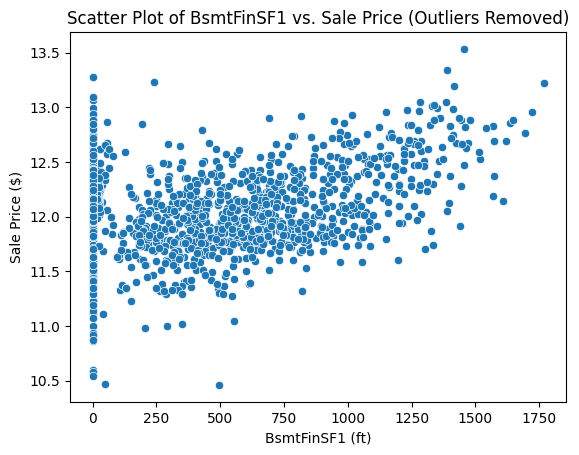

In [ ]:
#34th BsmtFinSF1
Q1 = df_house[['BsmtFinSF1']].quantile(0.1)
Q3 = df_house[['BsmtFinSF1']].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of data points where either BsmtFinSF1 or SalePrice are outliers
outliers = ((df_house[['BsmtFinSF1']] < (Q1 - 1.5 * IQR)) | (df_house[['BsmtFinSF1']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['BsmtFinSF1','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='BsmtFinSF1', y='SalePrice')
plt.title('Scatter Plot of BsmtFinSF1 vs. Sale Price (Outliers Removed)')
plt.xlabel('BsmtFinSF1 (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

Save it. Since there is obvious relationship with the sale price.

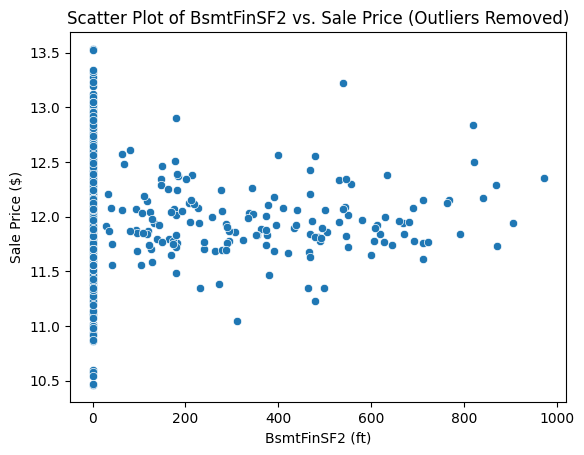

In [ ]:
#36th BsmtFinSF2
Q1 = df_house[['BsmtFinSF2']].quantile(0.05)
Q3 = df_house[['BsmtFinSF2']].quantile(0.95)
IQR = Q3 - Q1

# Determine the indices of data points where either BsmtFinSF2 or SalePrice are outliers
outliers = ((df_house[['BsmtFinSF2']] < (Q1 - 1.5 * IQR)) | (df_house[['BsmtFinSF2']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['BsmtFinSF2','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='BsmtFinSF2', y='SalePrice')
plt.title('Scatter Plot of BsmtFinSF2 vs. Sale Price (Outliers Removed)')
plt.xlabel('BsmtFinSF2 (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

No pattern found.

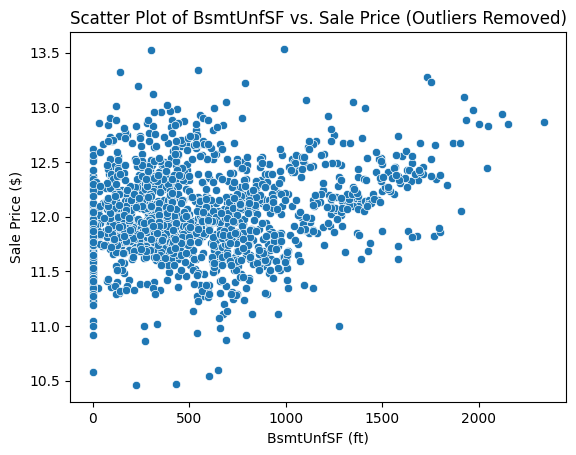

In [ ]:
Q1 = df_house[['BsmtUnfSF']].quantile(0.1)
Q3 = df_house[['BsmtUnfSF']].quantile(0.95)
IQR = Q3 - Q1

# Determine the indices of data points where either BsmtUnfSF or SalePrice are outliers
outliers = ((df_house[['BsmtUnfSF']] < (Q1 - 1.5 * IQR)) | (df_house[['BsmtUnfSF']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['BsmtUnfSF','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='BsmtUnfSF', y='SalePrice')
plt.title('Scatter Plot of BsmtUnfSF vs. Sale Price (Outliers Removed)')
plt.xlabel('BsmtUnfSF (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

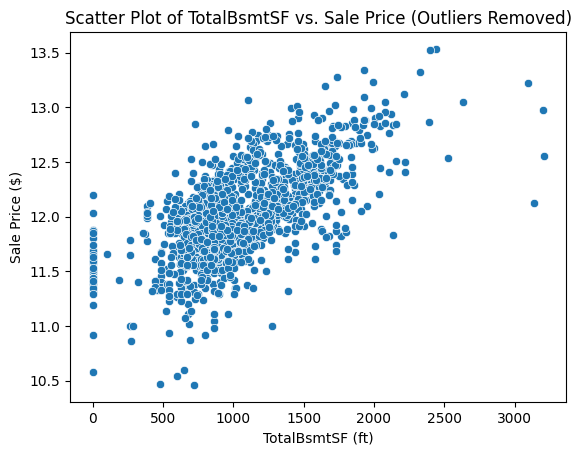

In [ ]:
Q1 = df_house[['TotalBsmtSF']].quantile(0.05)
Q3 = df_house[['TotalBsmtSF']].quantile(0.95)
IQR = Q3 - Q1

# Determine the indices of data points where either TotalBsmtSF or SalePrice are outliers
outliers = ((df_house[['TotalBsmtSF']] < (Q1 - 1.5 * IQR)) | (df_house[['TotalBsmtSF']]> (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
df_filtered = df_house[['TotalBsmtSF','SalePrice']][~outliers]

# Now, create the scatter plot with the filtered data
sns.scatterplot(data=df_filtered, x='TotalBsmtSF', y='SalePrice')
plt.title('Scatter Plot of TotalBsmtSF vs. Sale Price (Outliers Removed)')
plt.xlabel('TotalBsmtSF (ft)')
plt.ylabel('Sale Price ($)')

plt.show()

Obvious psotive relationship with the sale price,

In [ ]:
df_house[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145
...,...,...,...,...
1455,0,0,953,953
1456,790,163,589,1542
1457,275,0,877,1152
1458,49,1029,0,1078


Since we can find that TotalBsmtSF = BsmtFinSF1+BsmtFinSF2+BsmtUnfSF so that we could just use the TotalBsmtSF as final Basement variable to determine the sale price. Through the MIS score, TotalBsmtSF's score is the highest. So we can decide the variable selection by the MIS and MIC result.

# 6.Model-based Variable Selection

In [ ]:
categorical_columns = df_house.select_dtypes(include=['object', 'category']).columns

print("list:", list(categorical_columns))

list: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
df_house_copy = df_house.copy()

label_encoder = LabelEncoder()

for column in df_house_copy.columns:
    if df_house_copy[column].dtype == 'object':
        df_house_copy[column] = label_encoder.fit_transform(df_house_copy[column])

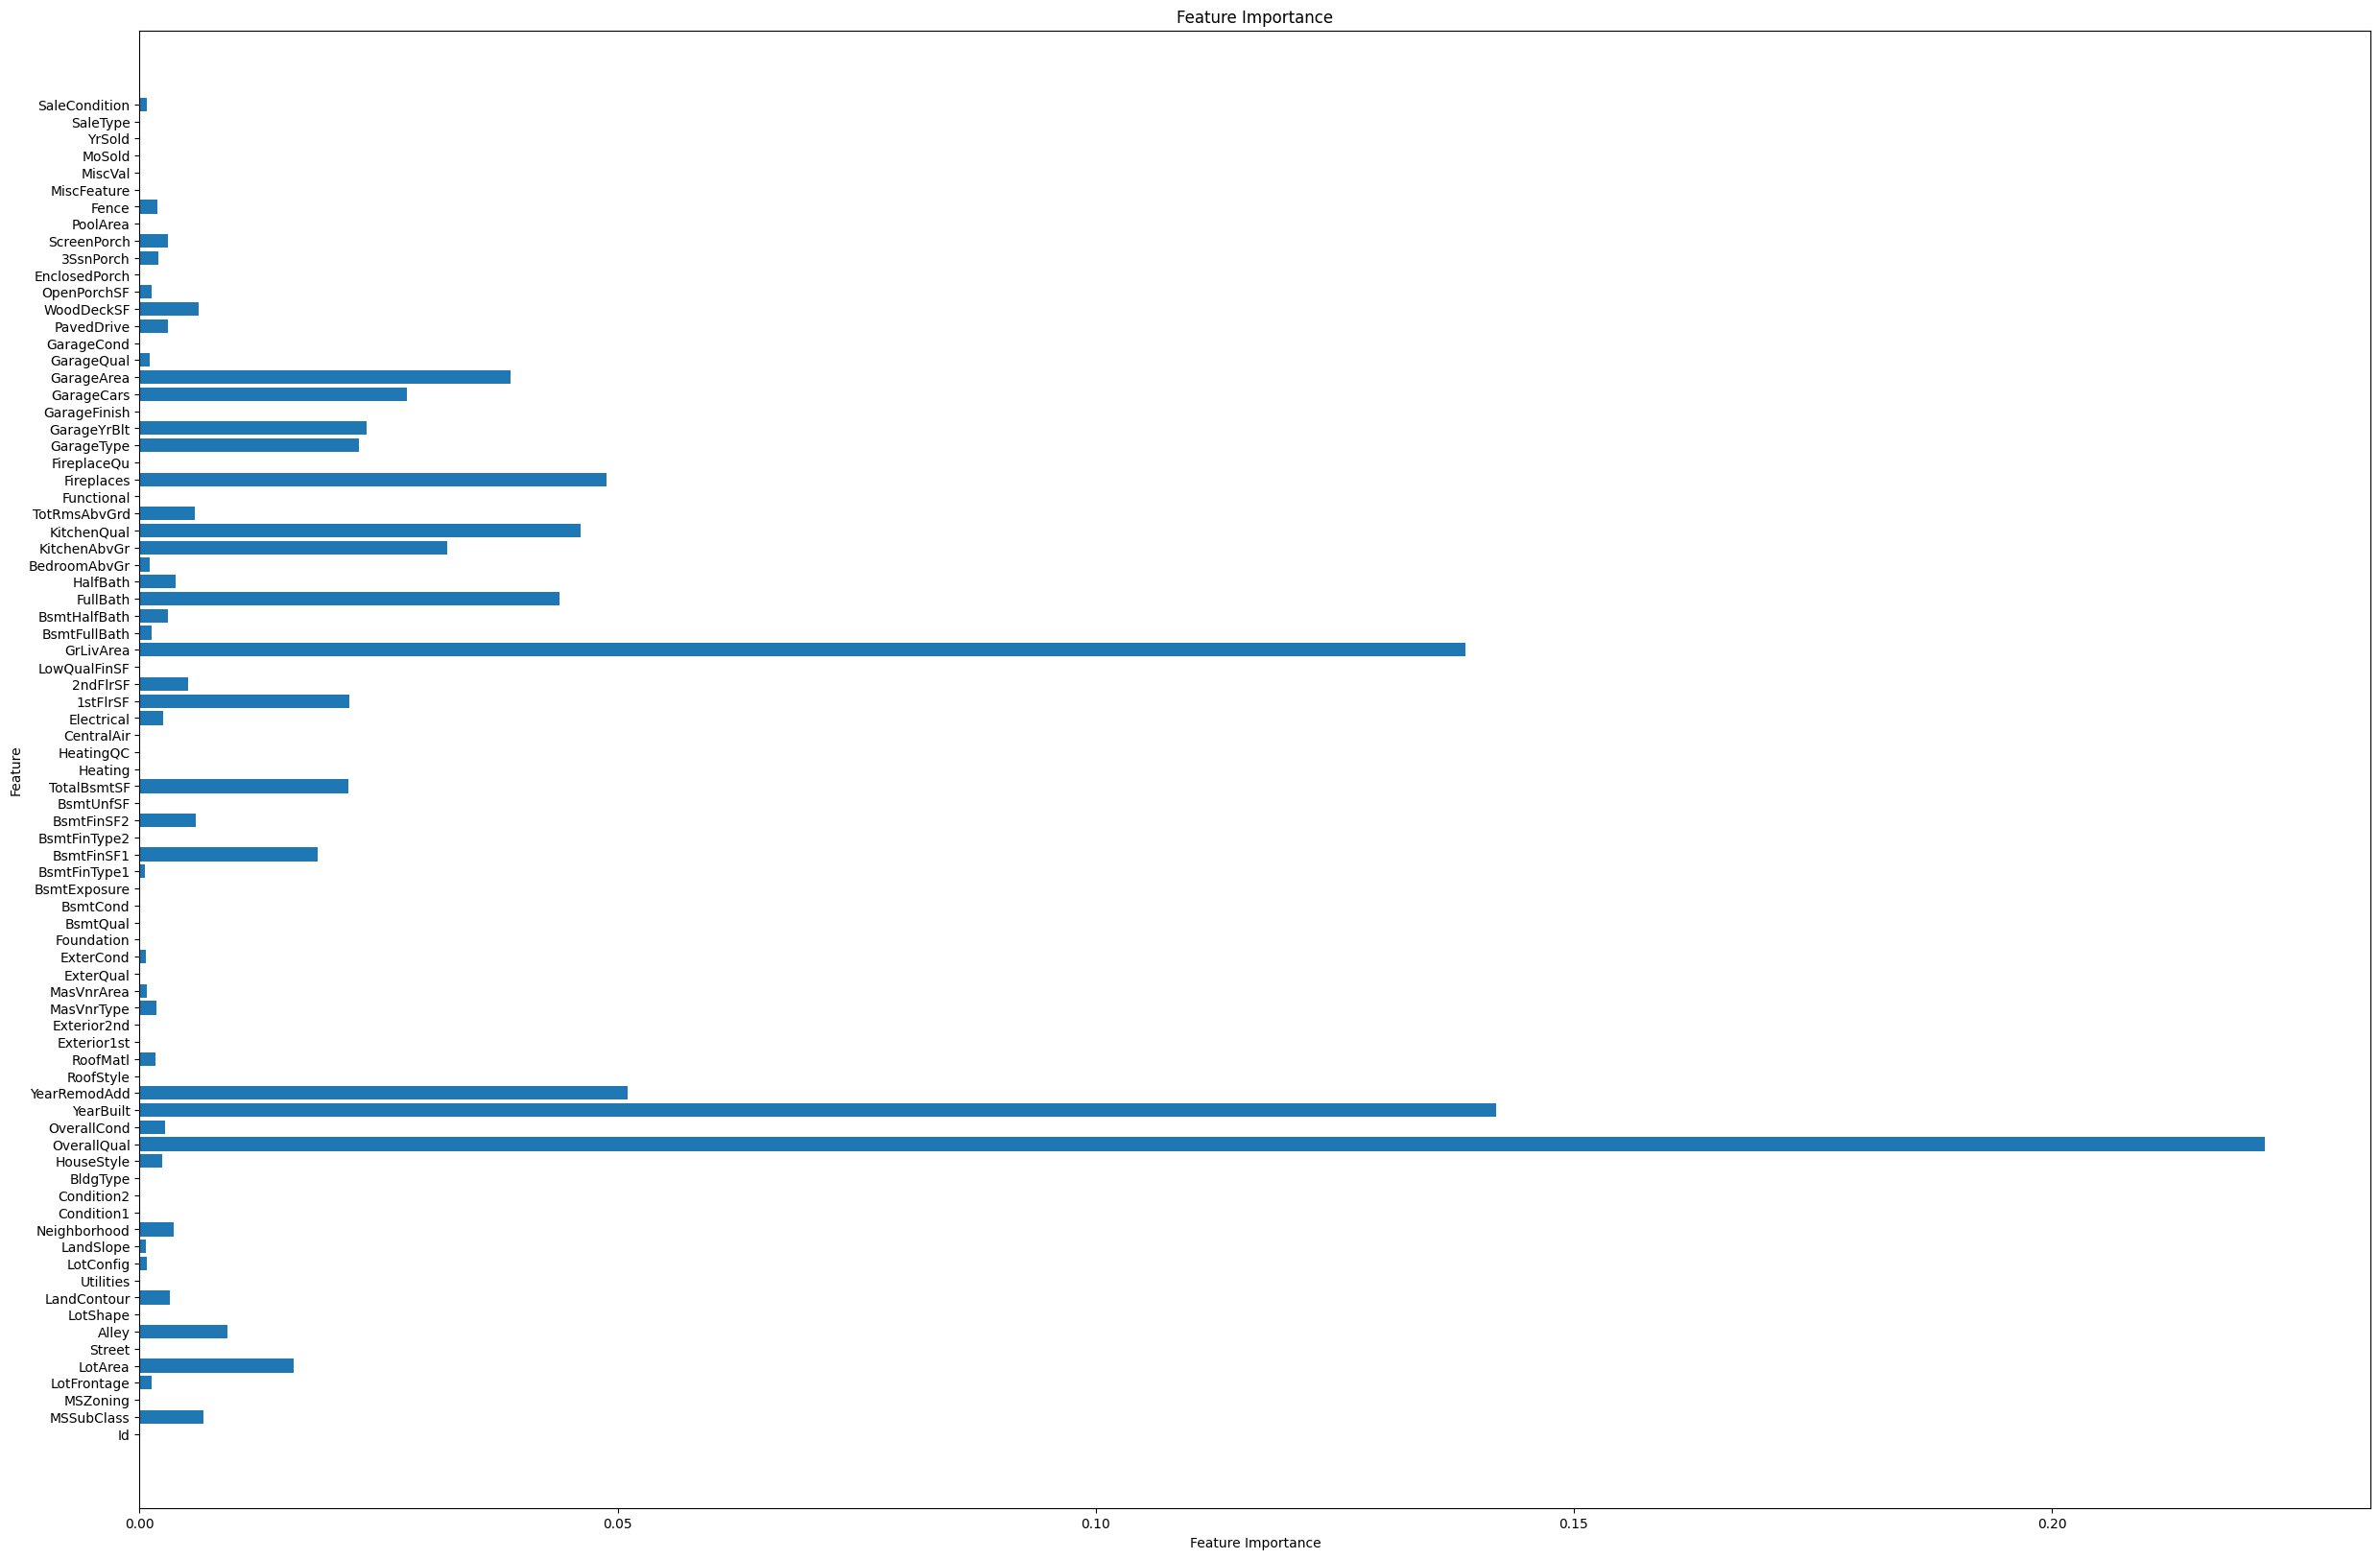

In [ ]:
# Split the dataset into training and testing sets
X = df_house_copy.drop('SalePrice', axis=1)
y = df_house_copy['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Train the model
model.fit(X_train, y_train)

# Get feature importances and visualize them
feature_importances = model.feature_importances_

# Plotting feature importances as a bar chart
plt.figure(figsize=(30, 20))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

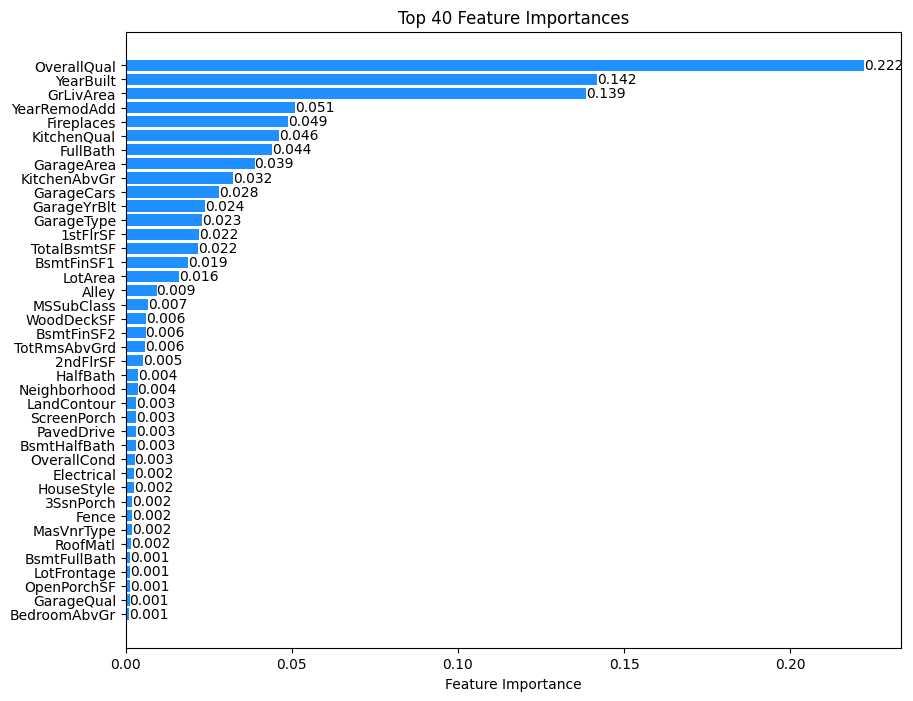

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_idx = np.argsort(feature_importances)[::-1]

# Number of features to visualize (you can adjust this number)
top_n = 40

# Create labels for the top n features
labels = np.array(X_train.columns)[sorted_idx][:top_n]

# Create a list of the top n feature importances
importances = feature_importances[sorted_idx][:top_n]

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.barh(range(top_n), importances, color='dodgerblue', align='center')
plt.yticks(range(top_n), labels)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 40 Feature Importances')

# Adding the importance values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.3f}',
             va='center', ha='left')

plt.show()

In [ ]:
# Merge Feature Importance, MIS amd MIC together.
df_Feature_imp = pd.DataFrame({
    'Variable': X_train.columns,
    'Feature_imp_num': feature_importances,
})
df_MIS = pd.DataFrame(mutual_info_results, columns=['Variable', 'MIS'])
df_MIC = pd.DataFrame(mic_results, columns=['Variable', 'MIC'])

In [ ]:
merged_df = pd.merge(df_Feature_imp, df_MIS, on='Variable', how='inner')
feature_decision_df = pd.merge(merged_df, df_MIC, on='Variable', how='inner')
feature_decision_df = feature_decision_df.sort_values(by='Feature_imp_num', ascending=False)
feature_decision_df['BoostRank'] = feature_decision_df['Feature_imp_num'].rank(method='dense', ascending=True)
feature_decision_df['MICRank'] = feature_decision_df['MIC'].rank(method='dense', ascending=True)
feature_decision_df['MISRank'] = feature_decision_df['MIS'].rank(method='dense', ascending=True)
feature_decision_df['MIC_MIS_Dif']=abs(feature_decision_df['MICRank']-feature_decision_df['MISRank'])

In [ ]:
feature_decision_df

,Variable,Feature_imp_num,MIS,MIC,BoostRank,MICRank,MISRank,MIC_MIS_Dif
17,OverallQual,0.222249,0.518229,0.560756,49.0,79.0,71.0,8.0
19,YearBuilt,0.141871,0.264603,0.408087,48.0,74.0,63.0,11.0
46,GrLivArea,0.138638,0.359389,0.484517,47.0,78.0,70.0,8.0
20,YearRemodAdd,0.051078,0.190624,0.289690,46.0,63.0,56.0,7.0
56,Fireplaces,0.048819,0.161138,0.328173,45.0,67.0,52.0,15.0
...,...,...,...,...,...,...,...,...
35,BsmtFinType2,0.000000,0.030929,0.099813,1.0,18.0,20.0,2.0
37,BsmtUnfSF,0.000000,0.058337,0.164439,1.0,44.0,31.0,13.0
40,HeatingQC,0.000000,0.128407,0.272624,1.0,59.0,51.0,8.0
41,CentralAir,0.000000,0.063550,0.176124,1.0,45.0,33.0,12.0


In [ ]:
feature_decision_df[feature_decision_df['MIC_MIS_Dif']>=15]

,Variable,Feature_imp_num,MIS,MIC,BoostRank,MICRank,MISRank,MIC_MIS_Dif
56,Fireplaces,0.048819,0.161138,0.328173,45.0,67.0,52.0,15.0
4,LotArea,0.016122,0.086072,0.257234,34.0,57.0,41.0,16.0
1,MSSubClass,0.006667,0.057359,0.278683,32.0,60.0,30.0,30.0
66,WoodDeckSF,0.006159,0.040178,0.187662,31.0,49.0,24.0,25.0
12,Neighborhood,0.003537,0.114073,0.429193,26.0,75.0,47.0,28.0
47,BsmtFullBath,0.001255,0.020317,0.141552,14.0,33.0,15.0,18.0
67,OpenPorchSF,0.001224,0.061266,0.281715,12.0,61.0,32.0,29.0
10,LotConfig,0.000769,0.000000,0.103098,8.0,19.0,1.0,18.0
33,BsmtFinType1,0.000579,0.036555,0.159036,4.0,43.0,23.0,20.0
0,Id,0.000000,0.000000,0.120200,1.0,28.0,1.0,27.0


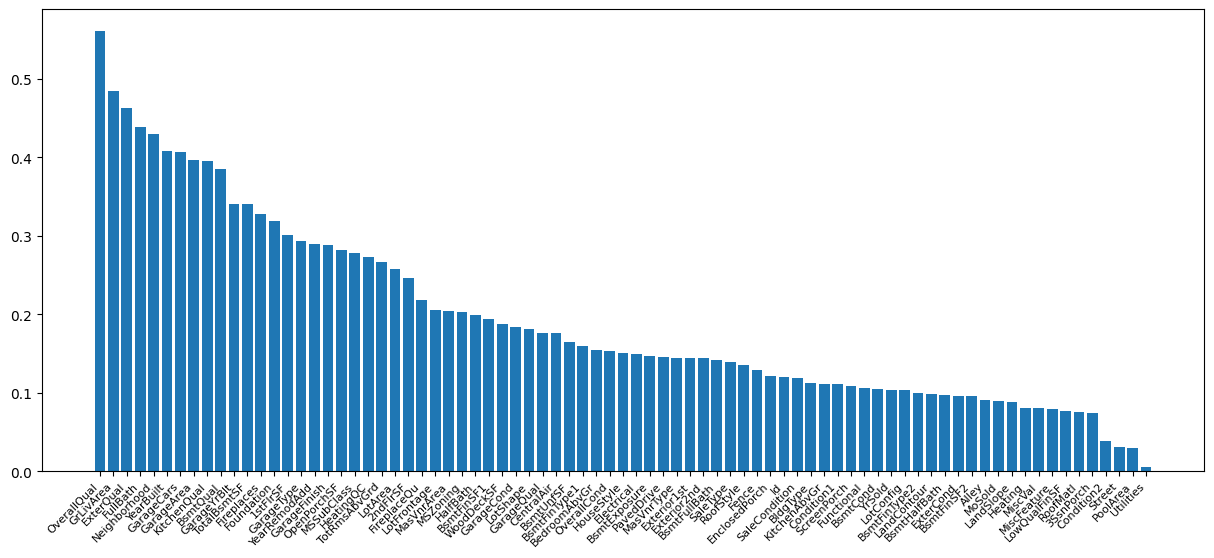

In [ ]:
Score_MIC=pd.DataFrame(mic_results, columns = ['ID', 'Score']).sort_values(by='Score', ascending=False)
plt.figure(figsize=(15, 6))
plt.bar(Score_MIC['ID'], height=Score_MIC['Score'])
plt.xticks(rotation=45, ha='right',fontsize=8)
plt.show()

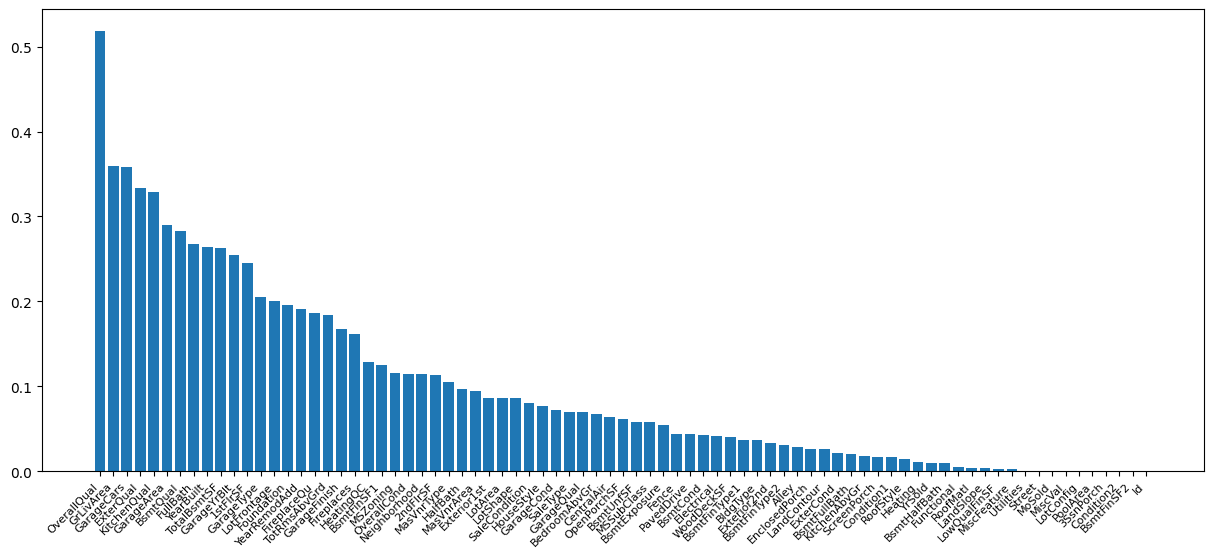

In [ ]:
Score_MIS=pd.DataFrame(mutual_info_results, columns = ['ID', 'Score']).sort_values(by='Score', ascending=False)
plt.figure(figsize=(15, 6))
plt.bar(Score_MIS['ID'], height=Score_MIS['Score'])
plt.xticks(rotation=45, ha='right',fontsize=8)
plt.show()

The feature importance from XGboost is tailored for XGboost model so that cannot use that to decide the variable selection for other models. Also,  since MIS views ID as the most useless variable comparing to MIC so MIS is more reliable. we only choose the MIS as the final Decision based on the structure of fault data, selecting variables before "Extenrior2nd"， or before "LotShape".  

In [ ]:
Score_MIS

,ID,Score
17,OverallQual,0.518229
46,GrLivArea,0.359389
61,GarageCars,0.357895
27,ExterQual,0.333665
53,KitchenQual,0.329060
...,...,...
71,PoolArea,0.000000
69,3SsnPorch,0.000000
14,Condition2,0.000000
36,BsmtFinSF2,0.000000


In [ ]:
# large Variable Combination
Score_MIS.reset_index()
index_of_exterior2nd = Score_MIS[Score_MIS['ID'] == 'Exterior2nd'].index[0]
selected_ids_large = Score_MIS.loc[:index_of_exterior2nd, 'ID'].tolist()
df_large = df_house.loc[:, selected_ids_large].copy()

In [ ]:
# Small Variable Combination
Score_MIS.reset_index()
index_of_exterior2nd = Score_MIS[Score_MIS['ID'] == 'LotShape'].index[0]
selected_ids_sml = Score_MIS.loc[:index_of_exterior2nd, 'ID'].tolist()
df_sml = df_house.loc[:, selected_ids_sml].copy()

In [ ]:
# df_xboost selected variables
#selected_features_xboost = feature_decision_df[feature_decision_df['Feature_imp_num'] <= 1]['Variable'].tolist()
#selected_features_MIC = feature_decision_df[feature_decision_df['MIC'] < 31]['Variable'].tolist()


In [ ]:
# text_cols_count = df_sml.select_dtypes(include=['object']).shape[1]
# 13 text col
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]

In [ ]:
# 26 objective varible in the df_large
ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

In [ ]:
df_sml.select_dtypes(include=['object']).shape[1]

13

# 7.Model fitting.

## 7.1 Linear Regression Model

In [ ]:
df_large = pd.read_csv('large.csv')
df_sml = pd.read_csv('sml.csv')

In [ ]:
y=df_house.SalePrice

In [ ]:
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = list(set(df_sml.columns) - set(ordinal_sml + onehot_sml))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())


In [ ]:
#onehot_sml.remove('Exterior1st')

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])
preprocessing.fit_transform(df_sml)
#preprocessing.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.31172464, -0.20714171, -1.73086488, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.31172464, -0.09188637, -1.7284922 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.31172464,  0.07347998, -1.72611953, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.02685765, -0.14781027,  1.72611953, ...,  0.        ,
         0.        ,  1.        ],
       [-1.02685765, -0.08016039,  1.7284922 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.02685765, -0.05811155,  1.73086488, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_sml, y, test_size=0.25, random_state=42)

In [ ]:
# ColumnTransformer.fit_transform(df_sml)
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)
#lin_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['GarageCars', 'LotArea',
                                                   'Unnamed: 0', 'GrLivArea',
                                                   'YearBuilt', 'HalfBath',
                                                   'GarageYrBlt', 'OverallCond',
                                                   '1stFlrSF', 'OverallQual',
                                                   '2ndFlrSF', 'FullBath',
                                                   'Fireplaces', 'LotFronta...
                                                  ['ExterQual', 'KitchenQual',
                                                   'BsmtQual', 'FireplaceQu',
                                                   'GarageFinish',
                                                   'HeatingQC']),
                                                 ('onehot',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['GarageType', 'Foundation',
                                                   'MSZoning', 'Neighborhood',
                                                   'MasVnrType', 'Exterior1st',
                                                   'LotShape'])])),
                ('linearregression', LinearRegression())])

In [ ]:
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

cv = ShuffleSplit(n_splits=250, test_size=0.25, random_state=42)

lr = LinearRegression()

CVInfo = cross_validate(lr,
                        X_train,
                        y_train,
                        cv=cv,
                        return_train_score=True,
                        scoring='r2')

print(f"Mean Train R^2 Score: {np.mean(CVInfo['train_score']):.3f}")
print(f"Mean Test R^2 Score: {np.mean(CVInfo['test_score']):.3f}")

lr.fit(X_train, y_train)
final_test_score = lr.score(X_test, y_test)
print("Final test sample score:", final_test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Train R^2 Score: 0.893
Mean Test R^2 Score: -650789562356993622016.000
Final test sample score: 0.9033331436919438


In [ ]:
# for large dataframe
num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
)
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

cv = ShuffleSplit(n_splits=250, test_size=0.25, random_state=42)

lr = LinearRegression()

CVInfo = cross_validate(lr,
                        X_train,
                        y_train,
                        cv=cv,
                        return_train_score=True,
                        scoring='r2')

print(f"Mean Train R^2 Score: {np.mean(CVInfo['train_score']):.3f}")
print(f"Mean Test R^2 Score: {np.mean(CVInfo['test_score']):.3f}")

lr.fit(X_train, y_train)
final_test_score = lr.score(X_test, y_test)
print("Final test sample score:", final_test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Train R^2 Score: 0.910
Mean Test R^2 Score: -159703866053974208544768.000
Final test sample score: -1324638366184906.5


## 7.1.2 Regulation Ridge

In [ ]:
# for small dataframe
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = list(set(df_sml.columns) - set(ordinal_sml + onehot_sml))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
lin_reg = make_pipeline(preprocessing, Ridge())
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns = preprocessing.get_feature_names_out(),
    index = df_sml.index
)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
param_grid={'alpha':[0.5, 1., 2., 5., 10., 100., 250., 500., 1000.]}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
ridge=Ridge()
grid_search=GridSearchCV(ridge,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_alpha']])
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_train, y_train, cv=cv,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_train, y_train)
print(best_model.score(X_test,y_test))


   rank_test_score  mean_test_score param_alpha
0                7         0.839163         0.5
1                5         0.840804         1.0
2                4         0.842473         2.0
3                2         0.844300         5.0
4                1         0.845110        10.0
5                3         0.843570       100.0
6                6         0.839466       250.0
7                8         0.831517       500.0
8                9         0.813930      1000.0
best param: {'alpha': 10.0}
best model: Ridge(alpha=10.0)
best test score: 0.8451100983797727
0.8849009723285582
0.8289349232462381
Final test sample:
0.893448475198903


In [ ]:
# for large dataframe
num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
lin_reg = make_pipeline(preprocessing, Ridge())
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns = preprocessing.get_feature_names_out(),
    index = df_large.index
)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
param_grid={'alpha':[0.5, 1., 2., 5., 10., 100., 250., 500., 1000.]}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
ridge=Ridge()
grid_search=GridSearchCV(ridge,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_alpha']])
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_train, y_train, cv=cv,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_train, y_train)
print(best_model.score(X_test,y_test))

   rank_test_score  mean_test_score param_alpha
0                8         0.830042         0.5
1                7         0.833794         1.0
2                5         0.837531         2.0
3                3         0.841714         5.0
4                2         0.843820        10.0
5                1         0.844259       100.0
6                4         0.841314       250.0
7                6         0.834659       500.0
8                9         0.819258      1000.0
best param: {'alpha': 100.0}
best model: Ridge(alpha=100.0)
best test score: 0.8442591623159058
0.8819536610263384
0.8376497541465212
Final test sample:
0.8860159734830385


Summary for Linear Regression Model: After adding the regulation by ridge regression, the performance improving a lot. There is not much difference  for larger or smaller features selection.

## 7.2 K Neighbors Regressor
Since there are at lease 30 dimensions, so that the the KNN performance will not great no matter how many neighbors used.

In [ ]:
# for small dataframe
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = list(set(df_sml.columns) - set(ordinal_sml + onehot_sml))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns = preprocessing.get_feature_names_out(),
    index = df_sml.index
)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
param_grid={'n_neighbors':list(range(1, 26))}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
knn=KNeighborsRegressor()
grid_search=GridSearchCV(knn,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_neighbors']])
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_train, y_train, cv=cv,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_train, y_train)
print(best_model.score(X_test,y_test))

    rank_test_score  mean_test_score param_n_neighbors
0                25         0.725036                 1
1                24         0.774521                 2
2                23         0.794574                 3
3                13         0.805058                 4
4                 6         0.811774                 5
5                 4         0.813564                 6
6                 1         0.814418                 7
7                 2         0.814344                 8
8                 3         0.813907                 9
9                 5         0.812670                10
10                7         0.811565                11
11                8         0.809923                12
12                9         0.808489                13
13               10         0.807189                14
14               11         0.806393                15
15               12         0.805371                16
16               14         0.804693                17
17        

In [ ]:
# for large dataframe
num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns = preprocessing.get_feature_names_out(),
    index = df_large.index
)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
param_grid={'n_neighbors':list(range(1, 26))}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
knn=KNeighborsRegressor()
grid_search=GridSearchCV(knn,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_neighbors']])
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_train, y_train, cv=cv,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_train, y_train)
print(best_model.score(X_test,y_test))

    rank_test_score  mean_test_score param_n_neighbors
0                25         0.712998                 1
1                24         0.776777                 2
2                19         0.795832                 3
3                12         0.802534                 4
4                 9         0.804173                 5
5                 8         0.804382                 6
6                 6         0.805116                 7
7                 4         0.806087                 8
8                 3         0.806149                 9
9                 1         0.806465                10
10                2         0.806276                11
11                5         0.805746                12
12                7         0.804669                13
13               10         0.803924                14
14               11         0.802881                15
15               13         0.801910                16
16               14         0.800505                17
17        

KNN Summary:

KNN R2 0.84 for small number features and 0.80 for large number features. This makes sense since knn has better prediction with low dimentions.

The perfomence is beyond the expectation. The main reason is scaling for all numerical variables.

## 7.3 Principle Component Regression

In [ ]:
# for small features components
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = list(set(df_sml.columns) - set(ordinal_sml + onehot_sml))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns = preprocessing.get_feature_names_out(),
    index = df_sml.index
)

PC1: 0.2820
PC2: 0.0991
PC3: 0.0827
PC4: 0.0557
PC5: 0.0450
PC6: 0.0390
PC7: 0.0356
PC8: 0.0333
PC9: 0.0317
PC10: 0.0292
PC11: 0.0253
PC12: 0.0233
PC13: 0.0213
PC14: 0.0170
PC15: 0.0146
PC16: 0.0118
PC17: 0.0112
PC18: 0.0110
PC19: 0.0103
PC20: 0.0097


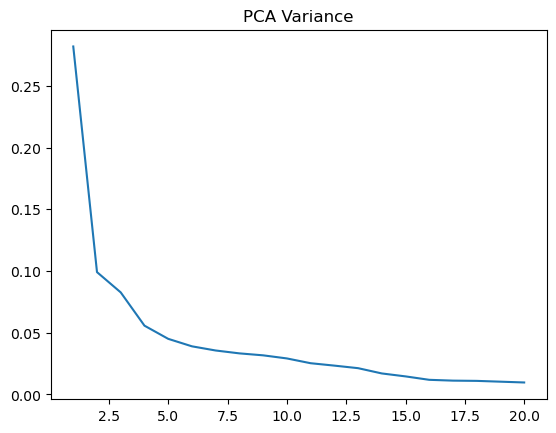

In [ ]:
# Apply PCA with 20 components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_transformed)

# Create a DataFrame from the PCA results
pca_columns = [f'PC{i+1}' for i in range(20)]  # Updated to only create 20 columns
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each of the first 20 principal components
for i, explained_var in enumerate(explained_variance_ratio):
    print(f'PC{i+1}: {explained_var:.4f}')

# The resulting DataFrame X_pca_df contains the first 20 principal components
# You can use this DataFrame for further analysis or visualization

# Plotting the explained variance for the first 20 components
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
#plt.grid()
plt.title('PCA Variance')
plt.show()

PC1: 0.2169
PC2: 0.1128
PC3: 0.0797
PC4: 0.0640
PC5: 0.0436
PC6: 0.0353
PC7: 0.0300
PC8: 0.0283
PC9: 0.0259
PC10: 0.0244
PC11: 0.0236
PC12: 0.0226
PC13: 0.0201
PC14: 0.0181
PC15: 0.0173
PC16: 0.0165
PC17: 0.0137
PC18: 0.0121
PC19: 0.0112
PC20: 0.0101


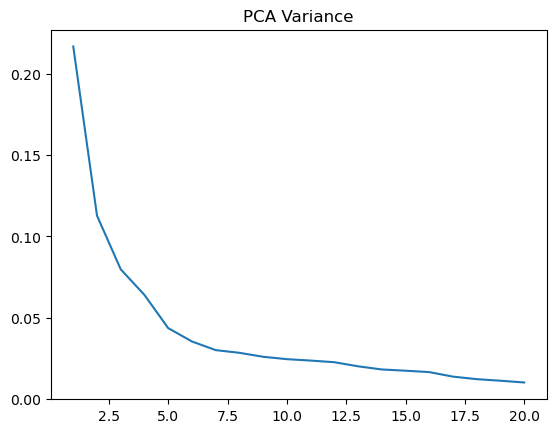

In [ ]:
shuffle = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns = preprocessing.get_feature_names_out(),
    index = df_large.index
)
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_transformed)

# Create a DataFrame from the PCA results
pca_columns = [f'PC{i+1}' for i in range(20)]  # Updated to only create 20 columns
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each of the first 20 principal components
for i, explained_var in enumerate(explained_variance_ratio):
    print(f'PC{i+1}: {explained_var:.4f}')

# The resulting DataFrame X_pca_df contains the first 20 principal components
# You can use this DataFrame for further analysis or visualization

# Plotting the explained variance for the first 20 components
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
#plt.grid()
plt.title('PCA Variance')
plt.show()

From the PCA, we can choose the first 5 principle component but still need to test each each situation seperately to decide.

In [ ]:
shuffle = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

results = []
for n_components in range(3, 20):  # From 3 to 10 components
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca_grid = pca.fit_transform(X_transformed)
    # Create a DataFrame for easier access to the principal components
    pca_df_grid = pd.DataFrame(X_pca_grid, columns=[f'PC{i+1}' for i in range(n_components)])
    # Perform cross-validation
    lr = LinearRegression()
    CVInfo = cross_validate(lr,pca_df_grid, y, cv=shuffle, return_train_score=True, n_jobs=-1)
    # Calculate average test score
    test_score = np.mean(CVInfo['test_score'])
    # Store results
    results.append({'n_components': n_components, 'test_score': test_score})

# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Rank the test scores
results_df['ranked'] = results_df['test_score'].rank(method='max', ascending=False)

# Display the DataFrame
print(results_df)



    n_components  test_score  ranked
0              3    0.825153    14.0
1              4    0.824216    15.0
2              5    0.823992    17.0
3              6    0.824172    16.0
4              7    0.829102    13.0
5              8    0.829942    11.0
6              9    0.829591    12.0
7             10    0.841993     9.0
8             11    0.839881    10.0
9             12    0.842510     7.0
10            13    0.842373     8.0
11            14    0.847240     6.0
12            15    0.847371     5.0
13            16    0.849596     4.0
14            17    0.851509     3.0
15            18    0.853484     1.0
16            19    0.853300     2.0


choosing 10 principle components is the best with R2 0.836 for small features.

In [ ]:
# for large features components
shuffle = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns = preprocessing.get_feature_names_out(),
    index = df_large.index
)
results = []
for n_components in range(3, 25):  # From 3 to 10 components
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca_grid = pca.fit_transform(X_transformed)
    # Create a DataFrame for easier access to the principal components
    pca_df_grid = pd.DataFrame(X_pca_grid, columns=[f'PC{i+1}' for i in range(n_components)])
    # Perform cross-validation
    lr = LinearRegression()
    CVInfo = cross_validate(lr,pca_df_grid, y, cv=shuffle, return_train_score=True, n_jobs=-1)
    # Calculate average test score
    test_score = np.mean(CVInfo['test_score'])
    # Store results
    results.append({'n_components': n_components, 'test_score': test_score})

# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Rank the test scores
results_df['ranked'] = results_df['test_score'].rank(method='max', ascending=False)

# Display the DataFrame
print(results_df)


    n_components  test_score  ranked
0              3    0.825154    19.0
1              4    0.824216    20.0
2              5    0.823990    22.0
3              6    0.824170    21.0
4              7    0.829098    18.0
5              8    0.829951    16.0
6              9    0.829592    17.0
7             10    0.841983    14.0
8             11    0.839878    15.0
9             12    0.842515    12.0
10            13    0.842377    13.0
11            14    0.847241    11.0
12            15    0.847363    10.0
13            16    0.849542     9.0
14            17    0.851722     8.0
15            18    0.853402     5.0
16            19    0.853143     6.0
17            20    0.852832     7.0
18            21    0.854253     3.0
19            22    0.853442     4.0
20            23    0.855714     1.0
21            24    0.855267     2.0


Choosing 22 principle components is the best with R2 0.845 for large features.

Principal Component Regression (PCR) results are similar to those from K-Nearest Neighbors (KNN) regression but do not surpass the performance of Ridge regression

Ridge Regression is strong since it deals with multicollinearity.

While PCR can reduce noise and redundancy in the data, it may also discard useful information if the discarded components (those with less variance but still significant predictive power) contain aspects of the data that are important for prediction.This is main reason for not bitting the ridge regression.

## 7.4 SVR

In [ ]:
df_large.shape

(1460, 51)

In [ ]:
# for small dataframe
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = list(set(df_sml.columns) - set(ordinal_sml + onehot_sml))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
lin_reg = make_pipeline(preprocessing, Ridge())
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns = preprocessing.get_feature_names_out(),
    index = df_sml.index
)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
Clist = [0.1,0.3, 0.4, 0.5,0.7, 1.0,2.0,3.0,5.0,10.,50,100.]
gammalist = [0, 0.005, 0.01,0.0015, 0.02,0.03, 0.04, 0.05]
#epsilonlist=[0.01, 0.1, 0.5, 1, 2, 5]
param_grid={'C':Clist,'gamma':gammalist}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
svr=SVR(kernel="rbf")
grid_search=GridSearchCV(svr,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_C', 'param_gamma']])
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_train, y_train, cv=cv,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_train, y_train)
print(best_model.score(X_test,y_test))


    rank_test_score  mean_test_score param_C param_gamma
0                88        -0.010282     0.1           0
1                31         0.872168     0.1       0.005
2                34         0.871061     0.1        0.01
3                62         0.838737     0.1      0.0015
4                48         0.852641     0.1        0.02
..              ...              ...     ...         ...
91               38         0.861847   100.0      0.0015
92               49         0.851998   100.0        0.02
93               55         0.844837   100.0        0.03
94               68         0.830688   100.0        0.04
95               78         0.812349   100.0        0.05

[96 rows x 4 columns]
best param: {'C': 2.0, 'gamma': 0.005}
best model: SVR(C=2.0, gamma=0.005)
best test score: 0.8913545973363207
0.9323197464925059
0.8930680597650937
Final test sample:
0.908563292581879


In [ ]:
# for large dataframe

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
Clist = [0.1,0.3, 0.4, 0.5,0.7, 1.0,2.0,3.0,5.0,10.,50,100.]
gammalist = [0, 0.005, 0.01,0.0015, 0.02,0.03, 0.04, 0.05]
#epsilonlist=[0.005, 0.01]
param_grid={'C':Clist,'gamma':gammalist}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
svr=SVR(kernel="rbf")
grid_search=GridSearchCV(svr,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_C', 'param_gamma']])
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_train, y_train, cv=cv,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_train, y_train)
print(best_model.score(X_test,y_test))

    rank_test_score  mean_test_score param_C param_gamma
0                86        -0.008016     0.1           0
1                26         0.874299     0.1       0.005
2                36         0.866502     0.1        0.01
3                47         0.845776     0.1      0.0015
4                58         0.830482     0.1        0.02
..              ...              ...     ...         ...
91               39         0.864459   100.0      0.0015
92               43         0.860787   100.0        0.02
93               51         0.833237   100.0        0.03
94               61         0.796006   100.0        0.04
95               73         0.752183   100.0        0.05

[96 rows x 4 columns]
best param: {'C': 0.7, 'gamma': 0.005}
best model: SVR(C=0.7, gamma=0.005)
best test score: 0.8934883653745795
0.9314628129768978
0.8937740255686187
Final test sample:
0.9073583814276647


## 7.5 Kernel Ridge Regression

In [ ]:
# for small dataframe
from sklearn.kernel_ridge import KernelRidge

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
param_grid={'alpha':[0.005,0.05,0.1,0.2, 0.3, 0.5,1.],'gamma':[0.005,.01,0.05,0.1,0.2,0.5,1.0],'kernel':['rbf']}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
score_used = 'r2'
grid_search=GridSearchCV(KernelRidge(),param_grid,cv=shuffle_split,scoring=score_used
                              ,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_alpha','param_gamma']])
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_train, y_train, cv=cv,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_train, y_train)
print(best_model.score(X_test,y_test))

    rank_test_score  mean_test_score param_alpha param_gamma
0                 1         0.252554       0.005       0.005
1                 7        -0.618563       0.005        0.01
2                15       -21.432629       0.005        0.05
3                22       -83.862343       0.005         0.1
4                29      -320.614471       0.005         0.2
5                36      -814.090202       0.005         0.5
6                43      -913.798362       0.005         1.0
7                 2         0.076565        0.05       0.005
8                 9        -0.909625        0.05        0.01
9                16       -22.350076        0.05        0.05
10               23       -85.727264        0.05         0.1
11               30      -325.977581        0.05         0.2
12               37      -817.329465        0.05         0.5
13               44      -914.757393        0.05         1.0
14                3        -0.028274         0.1       0.005
15               10     

In [ ]:

num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
score_used = 'r2'
param_grid={'alpha':[0.005,0.05,0.1,0.2, 0.3, 0.5,1.],'gamma':[0.005,.01,0.05,0.1,0.2,0.5,1.0],'kernel':['rbf']}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
grid_search=GridSearchCV(KernelRidge(),param_grid,cv=shuffle_split,scoring=score_used,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_alpha','param_gamma']])
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_train, y_train, cv=cv,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_train, y_train)
print(best_model.score(X_test,y_test))


    rank_test_score  mean_test_score param_alpha param_gamma
0                 1        -0.021567       0.005       0.005
1                 8        -1.757626       0.005        0.01
2                15       -52.287470       0.005        0.05
3                22      -214.322820       0.005         0.1
4                29      -632.230210       0.005         0.2
5                36      -895.518641       0.005         0.5
6                43      -922.256307       0.005         1.0
7                 2        -0.254503        0.05       0.005
8                 9        -2.158403        0.05        0.01
9                16       -53.547327        0.05        0.05
10               23      -218.098367        0.05         0.1
11               30      -637.988955        0.05         0.2
12               37      -896.641454        0.05         0.5
13               44      -922.647454        0.05         1.0
14                3        -0.405117         0.1       0.005
15               10     

## 7.6 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = list(set(df_sml.columns) - set(ordinal_sml + onehot_sml))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
    )

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns=preprocessing.get_feature_names_out(),
    index=df_sml.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
param_grid = {
    'min_samples_leaf': [5,7, 8,10,15,20],
    'max_depth': [3, 4, 5,6, 7, 8, 9, 10, 15]
}
grid_search = GridSearchCV(DecisionTreeRegressor(min_samples_split=5), param_grid, cv=shuffle_split, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'param_max_depth','param_min_samples_leaf']])
print("best param:", grid_search.best_params_)
print("best model:", grid_search.best_estimator_)
print("best test score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
CVInfo = cross_validate(best_model, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)
print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

best_model.fit(X_train, y_train)
final_test_score = best_model.score(X_test, y_test)
print("Final test sample score:", final_test_score)

    rank_test_score  mean_test_score param_max_depth param_min_samples_leaf
0                53         0.653593               3                      5
1                51         0.653593               3                      7
2                53         0.653593               3                      8
3                51         0.653593               3                     10
4                50         0.653958               3                     15
5                49         0.654114               3                     20
6                48         0.695724               4                      5
7                46         0.696171               4                      7
8                47         0.695952               4                      8
9                45         0.699691               4                     10
10               44         0.706962               4                     15
11               43         0.708636               4                     20
12          

In [ ]:
# For large features
num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_sml.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
param_grid = {
    'min_samples_leaf': [5,7, 8,10,15,20],
    'max_depth': [3, 4, 5,6, 7, 8, 9, 10, 15]
}
grid_search = GridSearchCV(DecisionTreeRegressor(min_samples_split=5), param_grid, cv=shuffle_split, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'param_max_depth','param_min_samples_leaf']])
print("best param:", grid_search.best_params_)
print("best model:", grid_search.best_estimator_)
print("best test score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
CVInfo = cross_validate(best_model, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)
print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

best_model.fit(X_train, y_train)
final_test_score = best_model.score(X_test, y_test)
print("Final test sample score:", final_test_score)

    rank_test_score  mean_test_score param_max_depth param_min_samples_leaf
0                54         0.654045               3                      5
1                53         0.654142               3                      7
2                52         0.654528               3                      8
3                51         0.654528               3                     10
4                50         0.655838               3                     15
5                49         0.656712               3                     20
6                47         0.698171               4                      5
7                48         0.698167               4                      7
8                46         0.698870               4                      8
9                45         0.700739               4                     10
10               44         0.704591               4                     15
11               43         0.706253               4                     20
12          

## 7.7 PCA Decision Tree

In [ ]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns = preprocessing.get_feature_names_out(),
    index = df_large.index
)
results = []
for n_components in range(3, 25):  # From 3 to 10 components
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca_grid = pca.fit_transform(X_transformed)
    # Create a DataFrame for easier access to the principal components
    pca_df_grid = pd.DataFrame(X_pca_grid, columns=[f'PC{i+1}' for i in range(n_components)])
    # Perform cross-validation
    lr = LinearRegression()
    CVInfo = cross_validate(DecisionTreeRegressor(max_depth=10, min_samples_leaf=15, min_samples_split=10),pca_df_grid, y, cv=shuffle, return_train_score=True, n_jobs=-1)
    # Calculate average test score
    test_score = np.mean(CVInfo['test_score'])
    # Store results
    results.append({'n_components': n_components, 'test_score': test_score})

# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Rank the test scores
results_df['ranked'] = results_df['test_score'].rank(method='max', ascending=False)

# Display the DataFrame
print(results_df)

    n_components  test_score  ranked
0              3    0.810207     5.0
1              4    0.806437     9.0
2              5    0.804571    14.0
3              6    0.803974    16.0
4              7    0.809798     6.0
5              8    0.808552     7.0
6              9    0.811747     1.0
7             10    0.811388     2.0
8             11    0.810557     4.0
9             12    0.810574     3.0
10            13    0.808279     8.0
11            14    0.806034    10.0
12            15    0.805438    11.0
13            16    0.804948    12.0
14            17    0.804544    15.0
15            18    0.804583    13.0
16            19    0.803356    17.0
17            20    0.802880    18.0
18            21    0.802841    19.0
19            22    0.801899    20.0
20            23    0.800753    21.0
21            24    0.799813    22.0


In [ ]:
# for large features components
shuffle = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns = preprocessing.get_feature_names_out(),
    index = df_large.index
)
results = []
for n_components in range(3, 25):  # From 3 to 10 components
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca_grid = pca.fit_transform(X_transformed)
    # Create a DataFrame for easier access to the principal components
    pca_df_grid = pd.DataFrame(X_pca_grid, columns=[f'PC{i+1}' for i in range(n_components)])
    # Perform cross-validation
    lr = LinearRegression()
    CVInfo = cross_validate(DecisionTreeRegressor(max_depth=10, min_samples_leaf=15, min_samples_split=10),pca_df_grid, y, cv=shuffle, return_train_score=True, n_jobs=-1)
    # Calculate average test score
    test_score = np.mean(CVInfo['test_score'])
    # Store results
    results.append({'n_components': n_components, 'test_score': test_score})

# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Rank the test scores
results_df['ranked'] = results_df['test_score'].rank(method='max', ascending=False)

# Display the DataFrame
print(results_df)


    n_components  test_score  ranked
0              3    0.815568     4.0
1              4    0.814920     5.0
2              5    0.813094     8.0
3              6    0.812037    13.0
4              7    0.812624    11.0
5              8    0.812115    12.0
6              9    0.810473    17.0
7             10    0.816043     2.0
8             11    0.815868     3.0
9             12    0.816241     1.0
10            13    0.814557     6.0
11            14    0.813654     7.0
12            15    0.812676    10.0
13            16    0.813035     9.0
14            17    0.811918    14.0
15            18    0.811057    15.0
16            19    0.810406    18.0
17            20    0.810566    16.0
18            21    0.809665    19.0
19            22    0.807476    20.0
20            23    0.806453    21.0
21            24    0.806353    22.0


In [ ]:
# for small features components with
shuffle = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns = preprocessing.get_feature_names_out(),
    index = df_large.index
)


    # Apply PCA
pca = PCA(n_components=9)
X_pca_grid = pca.fit_transform(X_transformed)
    # Create a DataFrame for easier access to the principal components

pca_df_grid = pd.DataFrame(X_pca_grid)
    # Perform cross-validationlr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(pca_df_grid, y, test_size=0.25, random_state=42)

shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
param_grid = {
    'min_samples_leaf': [5,7, 8,10,15,20],
    'max_depth': [3, 4, 5,6, 7, 8, 9, 10, 15]
}
grid_search = GridSearchCV(DecisionTreeRegressor(min_samples_split=5), param_grid, cv=shuffle_split, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'param_max_depth','param_min_samples_leaf']])
print("best param:", grid_search.best_params_)
print("best model:", grid_search.best_estimator_)
print("best test score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
CVInfo = cross_validate(best_model, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)
print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

best_model.fit(X_train, y_train)
final_test_score = best_model.score(X_test, y_test)
print("Final test sample score:", final_test_score)


    rank_test_score  mean_test_score param_max_depth param_min_samples_leaf
0                54         0.768862               3                      5
1                52         0.769482               3                      7
2                52         0.769482               3                      8
3                51         0.769676               3                     10
4                49         0.770497               3                     15
5                50         0.770272               3                     20
6                45         0.777822               4                      5
7                44         0.778383               4                      7
8                41         0.780950               4                      8
9                40         0.782403               4                     10
10               35         0.784661               4                     15
11               32         0.785817               4                     20
12          

In [ ]:
# for small features components with
shuffle = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])
#preprocessing.fit_transform(df_large)
#preprocessing.get_feature_names_out()
from sklearn.model_selection import GridSearchCV
X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns = preprocessing.get_feature_names_out(),
    index = df_large.index
)


    # Apply PCA
pca = PCA(n_components=12)
X_pca_grid = pca.fit_transform(X_transformed)
    # Create a DataFrame for easier access to the principal components

pca_df_grid = pd.DataFrame(X_pca_grid)
    # Perform cross-validationlr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(pca_df_grid, y, test_size=0.25, random_state=42)

shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
param_grid = {
    'min_samples_leaf': [5,7, 8,10,15,20],
    'max_depth': [3, 4, 5,6, 7, 8, 9, 10, 15]
}
grid_search = GridSearchCV(DecisionTreeRegressor(min_samples_split=5), param_grid, cv=shuffle_split, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'param_max_depth','param_min_samples_leaf']])
print("best param:", grid_search.best_params_)
print("best model:", grid_search.best_estimator_)
print("best test score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
CVInfo = cross_validate(best_model, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)
print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

best_model.fit(X_train, y_train)
final_test_score = best_model.score(X_test, y_test)
print("Final test sample score:", final_test_score)


    rank_test_score  mean_test_score param_max_depth param_min_samples_leaf
0                49         0.782812               3                      5
1                47         0.784176               3                      7
2                50         0.782674               3                      8
3                53         0.778593               3                     10
4                54         0.776862               3                     15
5                52         0.778809               3                     20
6                45         0.785762               4                      5
7                39         0.791190               4                      7
8                41         0.790221               4                      8
9                43         0.788190               4                     10
10               40         0.790558               4                     15
11               33         0.794704               4                     20
12          

## 7.8 Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2',10,25,75,100,125],
    'max_depth': [None, 10,15,20,50,100]
}

In [ ]:
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = ['LotArea','OverallQual','OverallCond','GarageYrBlt','YearRemodAdd','Fireplaces','BsmtFinSF1','YearBuilt','GrLivArea','GarageArea','HalfBath','FullBath','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','MasVnrArea','TotalBsmtSF','GarageCars',
 'LotFrontage']

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns=preprocessing.get_feature_names_out(),
    index=df_sml.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(random_state=42)
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
grid_search = GridSearchCV(rf, param_grid, cv=shuffle_split, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_features', 'param_max_depth']])
print("best param:", grid_search.best_params_)
print("best model:", grid_search.best_estimator_)
print("best test score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
CVInfo = cross_validate(best_model, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)
print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

best_model.fit(X_train, y_train)
final_test_score = best_model.score(X_test, y_test)
print("Final test sample score:", final_test_score)

In [ ]:
ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = ['LotArea','OverallQual','OverallCond','GarageYrBlt','YearRemodAdd','Fireplaces','BsmtFinSF1','YearBuilt','GrLivArea','GarageArea','HalfBath','FullBath','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','MasVnrArea','TotalBsmtSF','GarageCars',
 'LotFrontage']

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns=preprocessing.get_feature_names_out(),
    index=df_sml.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

rf_model = RandomForestRegressor(max_depth=15, max_features=25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

rf_model.fit(X_train, y_train)

final_test_score = rf_model.score(X_test, y_test)
print("Final test sample score:", final_test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Final test sample score: 0.8834636184422673


In [ ]:
shuffle = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(random_state=42)
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=50)
grid_search = GridSearchCV(rf, param_grid, cv=shuffle_split, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_features', 'param_max_depth']])
print("best param:", grid_search.best_params_)
print("best model:", grid_search.best_estimator_)
print("best test score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
CVInfo = cross_validate(best_model, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)
print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

best_model.fit(X_train, y_train)
final_test_score = best_model.score(X_test, y_test)
print("Final test sample score:", final_test_score)


    rank_test_score  mean_test_score param_n_estimators param_max_features  \
0                37         0.853258                100               auto   
1                20         0.858773                100               sqrt   
2                44         0.848825                100               log2   
3                25         0.857262                100                 10   
4                 1         0.865084                100                 25   
5                 7         0.864578                100                 75   
6                15         0.861431                100                100   
7                29         0.856952                100                125   
8                41         0.852285                100               auto   
9                35         0.853715                100               sqrt   
10               48         0.840730                100               log2   
11               42         0.851608                100         

## 7.9 Bayesian Regression

In [ ]:
from sklearn.linear_model import BayesianRidge

ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = list(set(df_sml.columns) - set(ordinal_sml + onehot_sml))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns=preprocessing.get_feature_names_out(),
    index=df_sml.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

br = BayesianRidge()

shuffle_split = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

CVInfo = cross_validate(br, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)

print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

br.fit(X_train, y_train)
final_test_score = br.score(X_test, y_test)
print("Final test sample score:", final_test_score)

Mean Train R^2 Score: 0.8867966743008254
Mean Test R^2 Score: 0.8149551426017723
Final test sample score: 0.8933029091433174


In [ ]:
num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

br = BayesianRidge()

shuffle_split = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

CVInfo = cross_validate(br, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)

print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

br.fit(X_train, y_train)
final_test_score = br.score(X_test, y_test)
print("Final test sample score:", final_test_score)

Mean Train R^2 Score: 0.9002748574402375
Mean Test R^2 Score: 0.8255451102505704
Final test sample score: 0.8913335175093263


## 7.10 XGBOOST

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.linear_model import BayesianRidge

ordinal_sml=["ExterQual", "KitchenQual", "BsmtQual", "FireplaceQu", "GarageFinish", "HeatingQC"]
onehot_sml=["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "Exterior1st","LotShape"]
num_sml = list(set(df_sml.columns) - set(ordinal_sml + onehot_sml))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_sml),
    ("ordinal", ordinal_pipeline, ordinal_sml),
    ("onehot", onehot_pipeline, onehot_sml)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_sml),
    #columns=preprocessing.get_feature_names_out(),
    index=df_sml.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

shuffle_split = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

CVInfo = cross_validate(xgb, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)

print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

xgb.fit(X_train, y_train)
final_test_score = xgb.score(X_test, y_test)
print("Final test sample score:", final_test_score)

Mean Train R^2 Score: 0.999933677834872
Mean Test R^2 Score: 0.8385011598186597
Final test sample score: 0.8759265453677667


In [ ]:
num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

shuffle_split = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

CVInfo = cross_validate(xgb, X_train, y_train, cv=shuffle_split, return_train_score=True, n_jobs=-1)

print("Mean Train R^2 Score:", np.mean(CVInfo['train_score']))
print("Mean Test R^2 Score:", np.mean(CVInfo['test_score']))

xgb.fit(X_train, y_train)
final_test_score = xgb.score(X_test, y_test)
print("Final test sample score:", final_test_score)

Mean Train R^2 Score: 0.9999453753696714
Mean Test R^2 Score: 0.8424325755344404
Final test sample score: 0.8873644427779019


## 7.11 Gradient Boosting Regressor

In [ ]:
param_grid = {
    'n_estimators': [50,100, 150, 200],
    'learning_rate': [0.05,0.1,0.5,1.0],
    'max_depth': [1, 2, 3, 4]
}

num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)

shuffle_split = ShuffleSplit(n_splits=50, test_size=0.25, random_state=42)

grid_search = GridSearchCV(gbr, param_grid, cv=shuffle_split, n_jobs=-1, verbose=1, scoring='r2')

grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_learning_rate', 'param_max_depth']])
print("Best parameters:", grid_search.best_params_)
print("best model:", grid_search.best_estimator_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
final_test_score = best_model.score(X_test, y_test)
print("Final test sample score:", final_test_score)

Fitting 50 folds for each of 64 candidates, totalling 3200 fits
    rank_test_score  mean_test_score param_n_estimators param_learning_rate  \
0                60         0.674130                 50                0.05   
1                51         0.785948                100                0.05   
2                42         0.822900                150                0.05   
3                31         0.836939                200                0.05   
4                49         0.788452                 50                0.05   
..              ...              ...                ...                 ...   
59               59         0.710161                200                 1.0   
60               61         0.667969                 50                 1.0   
61               62         0.666914                100                 1.0   
62               63         0.666854                150                 1.0   
63               64         0.666852                200            

## 7.12 Stacking Regressor

In [ ]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_large),
    #columns=preprocessing.get_feature_names_out(),
    index=df_large.index
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
estimators = [
    ('random_forest', RandomForestRegressor(max_features=25, random_state=42)),
    ('svr', SVR(C=0.7, gamma=0.005,kernel="rbf")),
    ('ridge', Ridge(alpha=100.0)),
    #('gradboost', GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42))
]

final_estimator = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

stacking_regressor.fit(X_train, y_train)

final_test_score = stacking_regressor.score(X_test, y_test)
print("Final test sample score:", final_test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Final test sample score: 0.900722622473823


# 8.Testing Data Cleaning

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_sml = pd.read_csv('sml.csv')

In [ ]:
selected_columns = df_sml.columns.intersection(df_test.columns)
df_selected_test = df_test[selected_columns]

In [ ]:
df_selected_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   ExterQual     1459 non-null   object 
 4   KitchenQual   1458 non-null   object 
 5   GarageArea    1458 non-null   float64
 6   BsmtQual      1415 non-null   object 
 7   FullBath      1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   TotalBsmtSF   1458 non-null   float64
 10  GarageYrBlt   1381 non-null   float64
 11  1stFlrSF      1459 non-null   int64  
 12  GarageType    1383 non-null   object 
 13  LotFrontage   1232 non-null   float64
 14  Foundation    1459 non-null   object 
 15  YearRemodAdd  1459 non-null   int64  
 16  FireplaceQu   729 non-null    object 
 17  TotRmsAbvGrd  1459 non-null   int64  
 18  GarageFinish  1381 non-null 

In [ ]:
is_bsmtexposure_nan = df_test['TotalBsmtSF'].isna()
# Combine the boolean masks to identify rows where any of the specified columns is NaN
any_bsmt_nan = is_bsmtexposure_nan | is_bsmtfintype2_nan

# Check if all specified columns have matching NaN values in rows where any NaN is detected
complete_bsmt_match = all(df_test[any_bsmt_nan][['BsmtFinSF1', 'TotalBsmtSF']].isna().all(axis=1))

print(complete_bsmt_match)

False


<ipython-input-114-6a153445b68e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  complete_bsmt_match = all(df_test[any_bsmt_nan][['BsmtFinSF1', 'TotalBsmtSF']].isna().all(axis=1))


In [ ]:
df_selected_test[df_selected_test['BsmtFinSF1'].isna()].filter(like='Bsmt', axis=1)

,BsmtQual,TotalBsmtSF,BsmtFinSF1
660,NaN,NaN,NaN


In [ ]:
# Using .loc for both row filtering and column selection
df_selected_test['Exterior1st'].value_counts()


Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64

In [ ]:
df_selected_test[(df_selected_test['MasVnrType'].isna())&(df_selected_test['MasVnrArea']==0)][['MasVnrArea']]

,MasVnrArea
0,0.0
2,0.0
4,0.0
5,0.0
6,0.0
...,...
1453,0.0
1454,0.0
1455,0.0
1456,0.0


In [ ]:
df_selected_test['GarageCars'].fillna(df_selected_test['GarageCars'].mean(), inplace = True)
df_selected_test['KitchenQual'].fillna('TA', inplace=True)
df_selected_test['GarageArea'].fillna(df_selected_test['GarageArea'].mean(),inplace = True)
df_selected_test['BsmtQual'].fillna('TA', inplace=True)
df_selected_test['TotalBsmtSF'].fillna(df_selected_test.loc[df_selected_test['BsmtQual'] == 'TA', 'TotalBsmtSF'].mean(), inplace = True)
df_selected_test['GarageYrBlt'].fillna(0, inplace = True)
df_selected_test['GarageType'].fillna('NA', inplace=True)
df_selected_test['LotFrontage'].fillna(df_selected_test['LotFrontage'].mean(), inplace = True)
df_selected_test['FireplaceQu'].fillna('NA', inplace=True)
df_selected_test['GarageFinish'].fillna('NA', inplace=True)
df_selected_test['BsmtFinSF1'].fillna(df_selected_test.loc[df_selected_test['BsmtQual'] == 'TA', 'BsmtFinSF1'].mean(), inplace = True)
df_selected_test['MSZoning'].fillna('RL', inplace=True)


<ipython-input-118-1f7982d22fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test['GarageCars'].fillna(df_selected_test['GarageCars'].mean(), inplace = True)
<ipython-input-118-1f7982d22fd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test['KitchenQual'].fillna('TA', inplace=True)
<ipython-input-118-1f7982d22fd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test['GarageArea'].fillna(df_

In [ ]:
df_selected_test['MasVnrType'].fillna('None', inplace = True)
df_selected_test['MasVnrArea'].fillna(0, inplace = True)
df_selected_test['Exterior1st'].fillna('VinylSd', inplace=True)

<ipython-input-119-52dbc77c2f3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test['MasVnrType'].fillna('None', inplace = True)
<ipython-input-119-52dbc77c2f3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test['MasVnrArea'].fillna(0, inplace = True)
<ipython-input-119-52dbc77c2f3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test['Exterior1st'].fillna('VinylSd', inplace=True)


In [ ]:
df_selected_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1459 non-null   float64
 3   ExterQual     1459 non-null   object 
 4   KitchenQual   1459 non-null   object 
 5   GarageArea    1459 non-null   float64
 6   BsmtQual      1459 non-null   object 
 7   FullBath      1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   TotalBsmtSF   1459 non-null   float64
 10  GarageYrBlt   1459 non-null   float64
 11  1stFlrSF      1459 non-null   int64  
 12  GarageType    1459 non-null   object 
 13  LotFrontage   1459 non-null   float64
 14  Foundation    1459 non-null   object 
 15  YearRemodAdd  1459 non-null   int64  
 16  FireplaceQu   1459 non-null   object 
 17  TotRmsAbvGrd  1459 non-null   int64  
 18  GarageFinish  1459 non-null 

In [ ]:
df_selected_test.head()

,OverallQual,GrLivArea,GarageCars,ExterQual,KitchenQual,GarageArea,BsmtQual,FullBath,YearBuilt,TotalBsmtSF,...,MSZoning,OverallCond,Neighborhood,2ndFlrSF,MasVnrType,HalfBath,MasVnrArea,Exterior1st,LotArea,LotShape
0,5,896,1.0,TA,TA,730.0,TA,1,1961,882.0,...,RH,6,NAmes,0,None,0,0.0,VinylSd,11622,Reg
1,6,1329,1.0,TA,Gd,312.0,TA,1,1958,1329.0,...,RL,6,NAmes,0,BrkFace,1,108.0,Wd Sdng,14267,IR1
2,5,1629,2.0,TA,TA,482.0,Gd,2,1997,928.0,...,RL,5,Gilbert,701,None,1,0.0,VinylSd,13830,IR1
3,6,1604,2.0,TA,Gd,470.0,TA,2,1998,926.0,...,RL,6,Gilbert,678,BrkFace,1,20.0,VinylSd,9978,IR1
4,8,1280,2.0,Gd,Gd,506.0,Gd,2,1992,1280.0,...,RL,5,StoneBr,0,None,0,0.0,HdBoard,5005,IR1


# 9.Fitting the Selected Model

In [ ]:
num_large = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt",
             "TotalBsmtSF", "GarageYrBlt", "1stFlrSF", "YearRemodAdd", "LotFrontage",
             "TotRmsAbvGrd", "Fireplaces", "BsmtFinSF1", "OverallCond", "2ndFlrSF", "LotArea",
             "MasVnrArea", "HalfBath", "BedroomAbvGr", "OpenPorchSF", "MSSubClass",
             "BsmtUnfSF", "WoodDeckSF"]

ordinal_large = ["KitchenQual", "ExterQual", "BsmtQual", "FireplaceQu", "GarageFinish",
                 "HeatingQC", "GarageQual", "GarageCond", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1"]

onehot_large = ["GarageType", "Foundation", "MSZoning", "Neighborhood", "MasVnrType", "LotShape",
               "Exterior1st", "HouseStyle", "SaleType", "SaleCondition", "CentralAir", "Fence",
               "Electrical", "PavedDrive", "BldgType", "Exterior2nd"]

In [ ]:
ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
    )
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, drop='first')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())


preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_large),
    ("ordinal", ordinal_pipeline, ordinal_large),
    ("onehot", onehot_pipeline, onehot_large)
])

X_transformed = pd.DataFrame(
    preprocessing.fit_transform(df_selected_test),
    #columns=preprocessing.get_feature_names_out(),
    index=df_selected_test.index)

y_pred = stacking_regressor.predict(X_transformed)

y_pred = np.exp(y_pred)

results_df = pd.DataFrame({
    "SalePrice": y_pred
}, index=df_selected_test.index)

final_output = df_test[['Id']].join(results_df, how='inner')
final_output.to_csv('submission.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>